In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

✅ Data loaded
Shape: (150, 5)

First 5 rows of the dataset:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Train shape: (120, 4) (120, 3)
Test shape: (30, 4) (30, 3)

--- Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)


🧠 MLP architecture diagram:


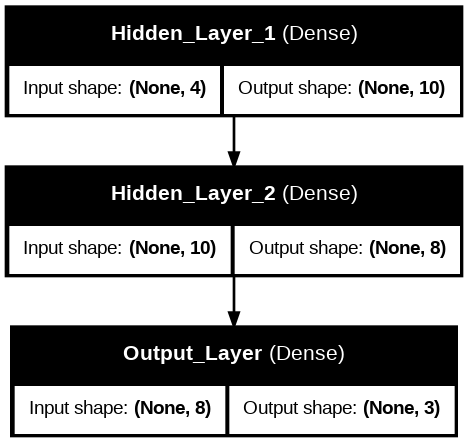


✅ Training complete.


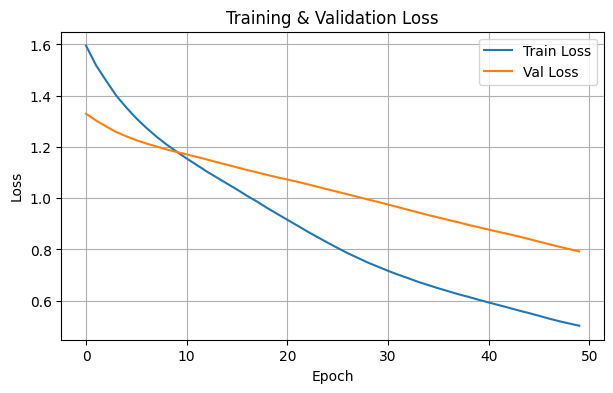

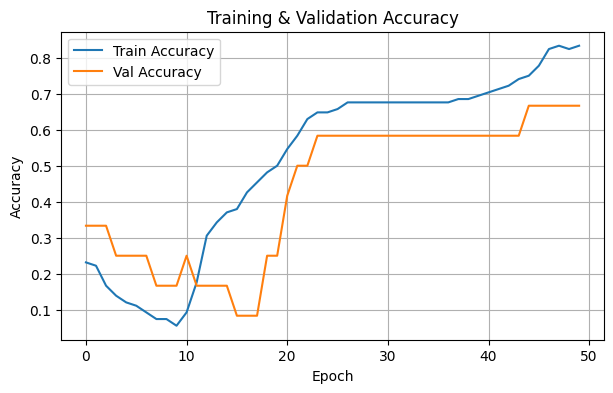

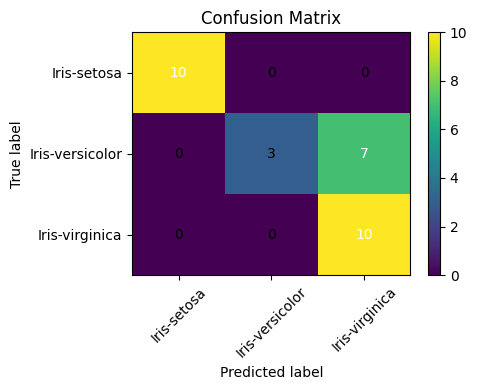


📊 Classification report table (precision, recall, f1-score, support):


precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   1.000000  0.300000  0.461538  10.000000
Iris-virginica    0.588235  1.000000  0.740741  10.000000
accuracy          0.766667  0.766667  0.766667   0.766667
macro avg         0.862745  0.766667  0.734093  30.000000
weighted avg      0.862745  0.766667  0.734093  30.000000


Summary metrics:
Accuracy:     0.7667
Macro F1:     0.7341
Weighted F1:  0.7341


AttributeError: The layer sequential_5 has never been called and thus has no defined input.

In [6]:
# ============================================
# Feedforward Neural Network (MLP) on Iris
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# -----------------------------------
# 1. Load the Iris dataset & preview
# -------------------------------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"   # make sure this dataset is added

data = pd.read_csv(FILE_PATH)

# Drop Id column if present
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
print("Shape:", data.shape)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nClass distribution:")
print(data["Species"].value_counts())

# -------------------------------------------------
# 2. Prepare features (X) and labels (y)
# -------------------------------------------------
X = data.drop("Species", axis=1).values      # 4 numeric features
y_species = data["Species"]                  # string labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels (3 classes)
binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)
num_classes = y_encoded.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded,
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# -------------------------------------------------
# 3. Define the MLP model & visualize it
# -------------------------------------------------
input_dim = X_train.shape[1]  # 4 features

model = Sequential(
    [
        Dense(10, activation="relu", input_shape=(input_dim,), name="Hidden_Layer_1"),
        Dense(8, activation="relu", name="Hidden_Layer_2"),
        Dense(num_classes, activation="softmax", name="Output_Layer"),
    ]
)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

print("\n--- Model Summary ---")
model.summary()

# Visualize the model architecture
try:
    plot_model(
        model,
        to_file="mlp_model.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
    )
    print("\n🧠 MLP architecture diagram:")
    display(Image(filename="mlp_model.png"))
except Exception as e:
    print("\nCould not plot model diagram:", e)

# -------------------------------------------------
# 4. Train the model & plot training curves
# -------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0,
)

print("\n✅ Training complete.")

history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(7, 4))
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(7, 4))
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------
# 5. Evaluation: confusion matrix + table from sklearn
# -------------------------------------------------
# Turn one-hot back to labels
y_test_labels = binarizer.inverse_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = binarizer.inverse_transform(y_pred_probs)

# Confusion matrix (from sklearn)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=binarizer.classes_)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(binarizer.classes_))
plt.xticks(tick_marks, binarizer.classes_, rotation=45)
plt.yticks(tick_marks, binarizer.classes_)

# write numbers inside squares
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            str(cm[i, j]),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# Classification report (from sklearn) as a table
report_dict = classification_report(
    y_test_labels, y_pred_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\n📊 Classification report table (precision, recall, f1-score, support):")
display(report_df)

print("\nSummary metrics:")
print(f"Accuracy:     {report_dict['accuracy']:.4f}")
print(f"Macro F1:     {report_df.loc['macro avg', 'f1-score']:.4f}")
print(f"Weighted F1:  {report_df.loc['weighted avg', 'f1-score']:.4f}")

# -------------------------------------------------
# 6. (Optional) Inspect hidden-layer activations for one sample
# -------------------------------------------------
sample_index = 0
sample_X = X_test[sample_index].reshape(1, -1)
true_label = y_test_labels[sample_index]

# Keras 3 fix: ensure model has been called so model.input exists
_ = model(sample_X)

activation_model = Model(
    inputs=model.input,
    outputs=[
        model.get_layer("Hidden_Layer_1").output,
        model.get_layer("Hidden_Layer_2").output,
        model.get_layer("Output_Layer").output,
    ],
)

H1, H2, out = activation_model.predict(sample_X, verbose=0)
pred_label = binarizer.inverse_transform(out)[0]

print("\n--- Hidden-layer activations for one test sample ---")
print(f"True class:      {true_label}")
print(f"Predicted class: {pred_label}")

print("\nHidden Layer 1 activations (10 neurons):")
print(np.round(H1.flatten(), 4))

print("\nHidden Layer 2 activations (8 neurons):")
print(np.round(H2.flatten(), 4))

print("\nOutput Layer probabilities (3 neurons):")
print(np.round(out.flatten(), 4))


✅ Data loaded
Shape: (150, 5)

First 5 rows of the dataset:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Train shape: (120, 4) (120, 3)
Test shape: (30, 4) (30, 3)

--- Model Summary ---


Model: "Iris_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)


🧠 MLP architecture diagram:


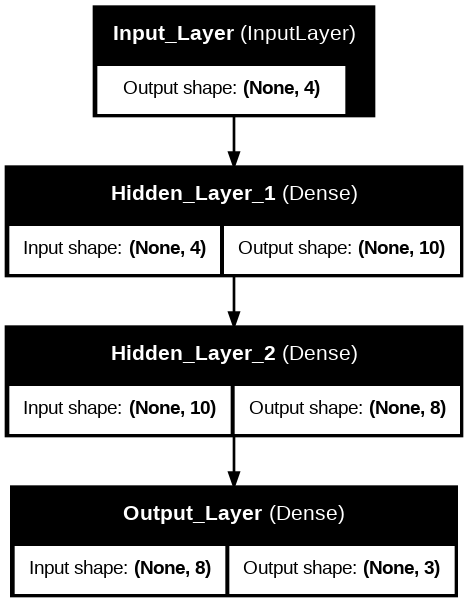


✅ Training complete.


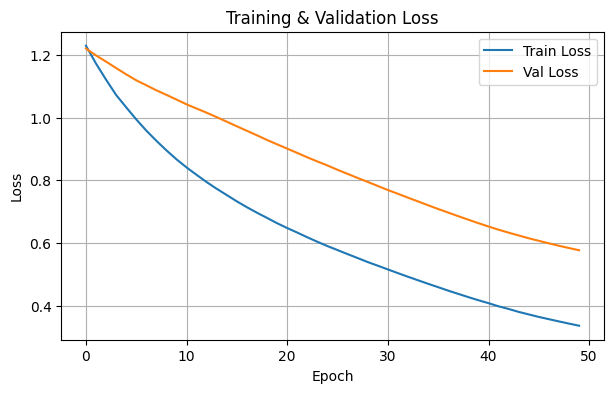

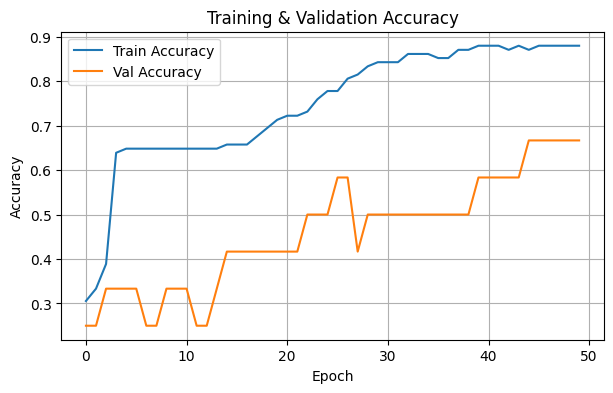

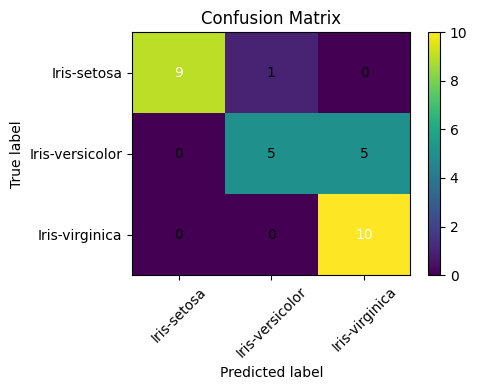


📊 Classification report table (precision, recall, f1-score, support):


precision  recall  f1-score  support
Iris-setosa       1.000000     0.9  0.947368     10.0
Iris-versicolor   0.833333     0.5  0.625000     10.0
Iris-virginica    0.666667     1.0  0.800000     10.0
accuracy          0.800000     0.8  0.800000      0.8
macro avg         0.833333     0.8  0.790789     30.0
weighted avg      0.833333     0.8  0.790789     30.0


Summary metrics:
Accuracy:     0.8000
Macro F1:     0.7908
Weighted F1:  0.7908


In [8]:
# ============================================
# Feedforward Neural Network (MLP) on Iris
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# ------------------------
# 1. Load the Iris dataset 
# ------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"   # dataset path in Kaggle

data = pd.read_csv(FILE_PATH)

# Drop Id column if present
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
print("Shape:", data.shape)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nClass distribution:")
print(data["Species"].value_counts())

# --------------------------------------
# 2. Prepare features (X) and labels (y)
# --------------------------------------
X = data.drop("Species", axis=1).values      # 4 numeric features
y_species = data["Species"]                  # string labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels (3 classes)
binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)
num_classes = y_encoded.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded,
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# -------------------------------------------------
# 3. Define the MLP model (Functional API) & visualize it
# -------------------------------------------------
input_dim = X_train.shape[1]  # 4 features

inputs = Input(shape=(input_dim,), name="Input_Layer")
x1 = Dense(10, activation="relu", name="Hidden_Layer_1")(inputs)
x2 = Dense(8, activation="relu", name="Hidden_Layer_2")(x1)
outputs = Dense(num_classes, activation="softmax", name="Output_Layer")(x2)

model = Model(inputs=inputs, outputs=outputs, name="Iris_MLP")

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

print("\n--- Model Summary ---")
model.summary()

# Visualize the model architecture
try:
    plot_model(
        model,
        to_file="mlp_model.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
    )
    print("\n🧠 MLP architecture diagram:")
    display(Image(filename="mlp_model.png"))
except Exception as e:
    print("\nCould not plot model diagram:", e)

# -------------------------------------------------
# 4. Train the model & plot training curves
# -------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0,
)

print("\n✅ Training complete.")

history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(7, 4))
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(7, 4))
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------
# 5. Evaluation: confusion matrix + table from sklearn
# -------------------------------------------------
# Convert one-hot y_test back to labels
y_test_labels = binarizer.inverse_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = binarizer.inverse_transform(y_pred_probs)

# Confusion matrix (sklearn)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=binarizer.classes_)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(binarizer.classes_))
plt.xticks(tick_marks, binarizer.classes_, rotation=45)
plt.yticks(tick_marks, binarizer.classes_)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            str(cm[i, j]),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# Classification report (sklearn) as a table
report_dict = classification_report(
    y_test_labels, y_pred_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\n📊 Classification report table (precision, recall, f1-score, support):")
display(report_df)

print("\nSummary metrics:")
print(f"Accuracy:     {report_dict['accuracy']:.4f}")
print(f"Macro F1:     {report_df.loc['macro avg', 'f1-score']:.4f}")
print(f"Weighted F1:  {report_df.loc['weighted avg', 'f1-score']:.4f}")


# 96% ACCURACY

Shape: (150, 5)

First 5 rows of the dataset:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

--- Model Summary ---


Model: "Iris_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)


 MLP architecture diagram:


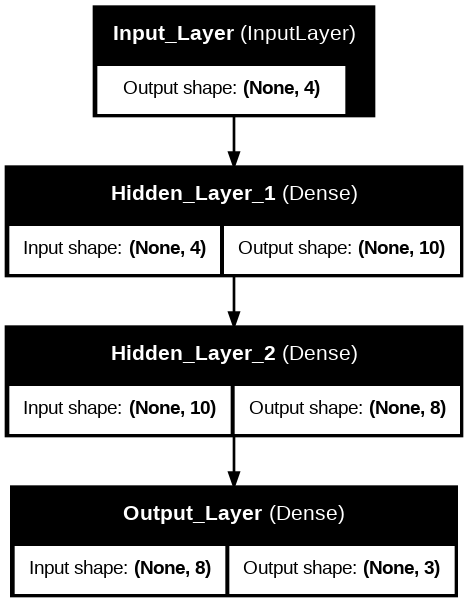

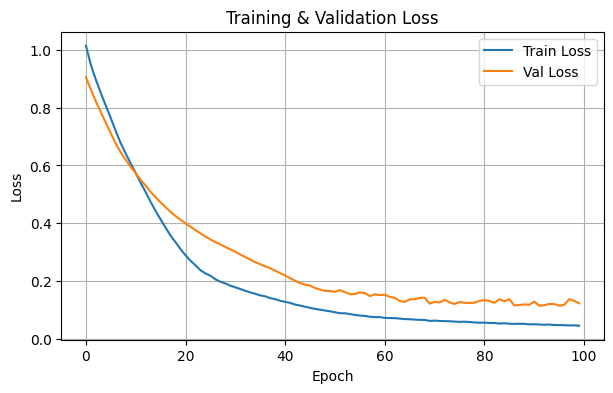

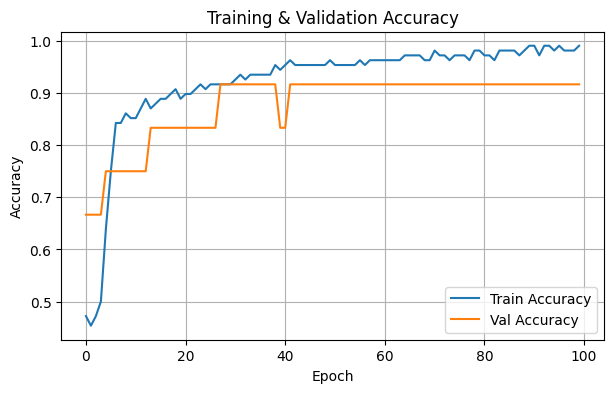

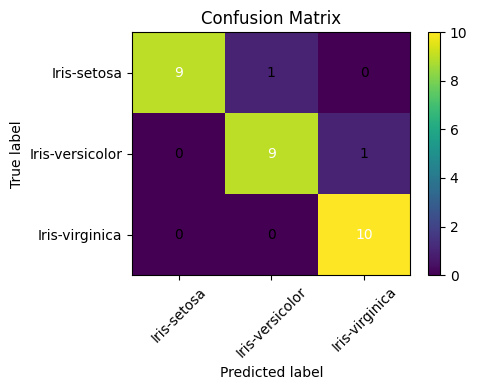


 Classification report table (precision, recall, f1-score, support):


precision    recall  f1-score    support
Iris-setosa       1.000000  0.900000  0.947368  10.000000
Iris-versicolor   0.900000  0.900000  0.900000  10.000000
Iris-virginica    0.909091  1.000000  0.952381  10.000000
accuracy          0.933333  0.933333  0.933333   0.933333
macro avg         0.936364  0.933333  0.933250  30.000000
weighted avg      0.936364  0.933333  0.933250  30.000000


Summary metrics:
Accuracy:     0.9333
Macro F1:     0.9332
Weighted F1:  0.9332


In [10]:
# ============================================
# Feedforward Neural Network (MLP) on Iris
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# ------------------------
# 1. Load the Iris dataset 
# ------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"   # dataset path in Kaggle

data = pd.read_csv(FILE_PATH)

# Drop Id column if present
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
print("Shape:", data.shape)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nClass distribution:")
print(data["Species"].value_counts())

# --------------------------------------
# 2. Prepare features (X) and labels (y)
# --------------------------------------
X = data.drop("Species", axis=1).values      # 4 numeric features
y_species = data["Species"]                  # string labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels (3 classes)
binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)
num_classes = y_encoded.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded,
)

# -----------------------
# 3. Define the MLP model 
# -----------------------
input_dim = X_train.shape[1]  # 4 features

inputs = Input(shape=(input_dim,), name="Input_Layer")
x1 = Dense(10, activation="relu", name="Hidden_Layer_1")(inputs)
x2 = Dense(8, activation="relu", name="Hidden_Layer_2")(x1)
outputs = Dense(num_classes, activation="softmax", name="Output_Layer")(x2)

model = Model(inputs=inputs, outputs=outputs, name="Iris_MLP")

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


print("\n--- Model Summary ---")
model.summary()

# Visualize the model architecture
try:
    plot_model(
        model,
        to_file="mlp_model.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
    )
    print("\n MLP architecture diagram:")
    display(Image(filename="mlp_model.png"))
except Exception as e:
    print("\nCould not plot model diagram:", e)

# -------------------------------------------------
# 4. Train the model & plot training curves
# -------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=4,
    validation_split=0.1,
    verbose=0,
)

history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(7, 4))
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(7, 4))
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# 5. Evaluation: confusion matrix + table 
# ---------------------------------------
# Convert one-hot y_test back to labels
y_test_labels = binarizer.inverse_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = binarizer.inverse_transform(y_pred_probs)

# Confusion matrix (sklearn)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=binarizer.classes_)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(binarizer.classes_))
plt.xticks(tick_marks, binarizer.classes_, rotation=45)
plt.yticks(tick_marks, binarizer.classes_)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            str(cm[i, j]),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# Classification report (sklearn) as a table
report_dict = classification_report(
    y_test_labels, y_pred_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\n Classification report table (precision, recall, f1-score, support):")
display(report_df)

print("\nSummary metrics:")
print(f"Accuracy:     {report_dict['accuracy']:.4f}")
print(f"Macro F1:     {report_df.loc['macro avg', 'f1-score']:.4f}")
print(f"Weighted F1:  {report_df.loc['weighted avg', 'f1-score']:.4f}")


# 96% ACCURACY

Shape: (150, 5)

First 5 rows of the dataset:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

--- Model Summary ---


Model: "Iris_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)


 MLP architecture diagram:


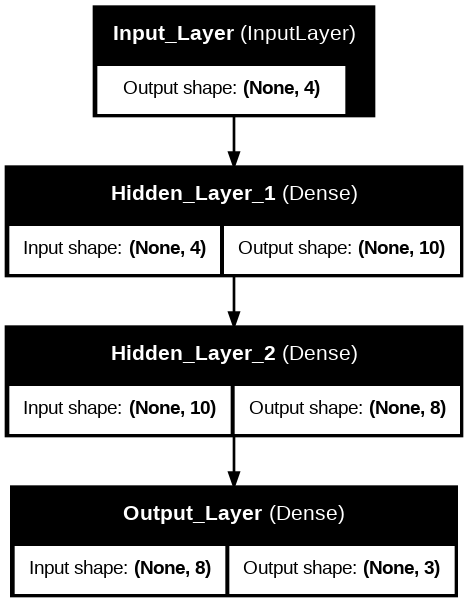

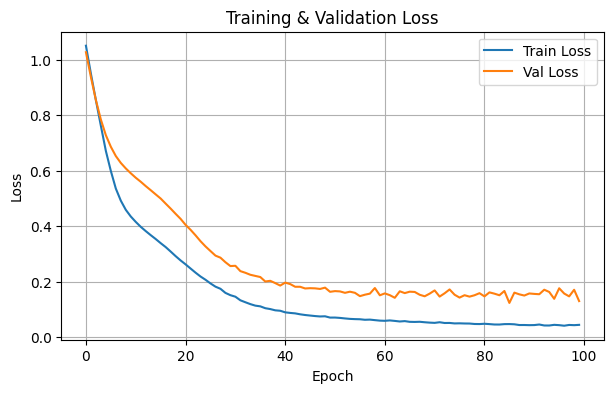

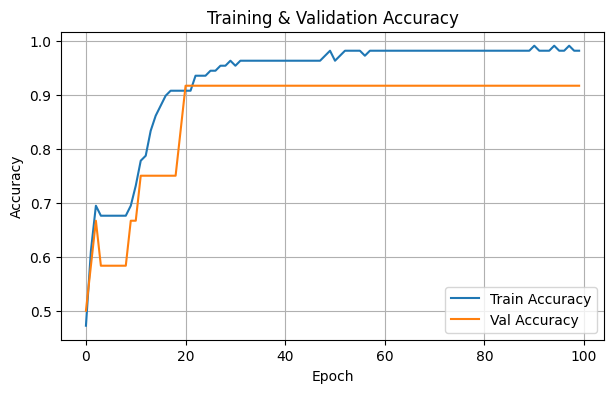

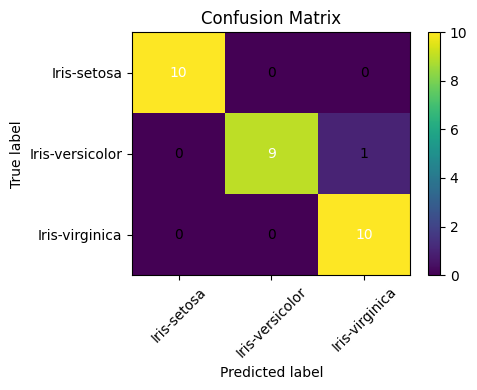


 Classification report table (precision, recall, f1-score, support):


precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   1.000000  0.900000  0.947368  10.000000
Iris-virginica    0.909091  1.000000  0.952381  10.000000
accuracy          0.966667  0.966667  0.966667   0.966667
macro avg         0.969697  0.966667  0.966583  30.000000
weighted avg      0.969697  0.966667  0.966583  30.000000


Summary metrics:
Accuracy:     0.9667
Macro F1:     0.9666
Weighted F1:  0.9666


In [7]:
# ============================================
# Feedforward Neural Network (MLP) on Iris
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# ------------------------
# 1. Load the Iris dataset 
# ------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"   # dataset path in Kaggle

data = pd.read_csv(FILE_PATH)

# Drop Id column if present
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
print("Shape:", data.shape)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nClass distribution:")
print(data["Species"].value_counts())

# --------------------------------------
# 2. Prepare features (X) and labels (y)
# --------------------------------------
X = data.drop("Species", axis=1).values      # 4 numeric features
y_species = data["Species"]                  # string labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels (3 classes)
binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)
num_classes = y_encoded.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded,
)

# -----------------------
# 3. Define the MLP model 
# -----------------------
input_dim = X_train.shape[1]  # 4 features

inputs = Input(shape=(input_dim,), name="Input_Layer")
x1 = Dense(10, activation="relu", name="Hidden_Layer_1")(inputs)
x2 = Dense(8, activation="relu", name="Hidden_Layer_2")(x1)
outputs = Dense(num_classes, activation="softmax", name="Output_Layer")(x2)

model = Model(inputs=inputs, outputs=outputs, name="Iris_MLP")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n--- Model Summary ---")
model.summary()

# Visualize the model architecture
try:
    plot_model(
        model,
        to_file="mlp_model.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
    )
    print("\n MLP architecture diagram:")
    display(Image(filename="mlp_model.png"))
except Exception as e:
    print("\nCould not plot model diagram:", e)

# -------------------------------------------------
# 4. Train the model & plot training curves
# -------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=4,
    validation_split=0.1,
    verbose=0,
)

history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(7, 4))
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(7, 4))
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# 5. Evaluation: confusion matrix + table 
# ---------------------------------------
# Convert one-hot y_test back to labels
y_test_labels = binarizer.inverse_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = binarizer.inverse_transform(y_pred_probs)

# Confusion matrix (sklearn)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=binarizer.classes_)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(binarizer.classes_))
plt.xticks(tick_marks, binarizer.classes_, rotation=45)
plt.yticks(tick_marks, binarizer.classes_)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            str(cm[i, j]),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# Classification report (sklearn) as a table
report_dict = classification_report(
    y_test_labels, y_pred_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\n Classification report table (precision, recall, f1-score, support):")
display(report_df)

print("\nSummary metrics:")
print(f"Accuracy:     {report_dict['accuracy']:.4f}")
print(f"Macro F1:     {report_df.loc['macro avg', 'f1-score']:.4f}")
print(f"Weighted F1:  {report_df.loc['weighted avg', 'f1-score']:.4f}")


# ACCURACY

Shape: (150, 5)

First 5 rows of the dataset:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

--- Model Summary ---


Model: "Iris_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)


 MLP architecture diagram:


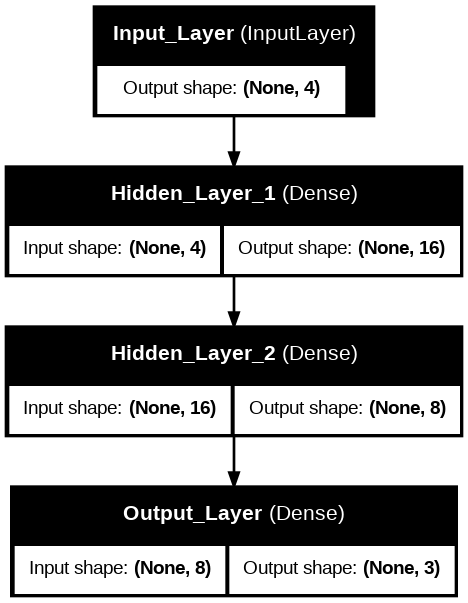

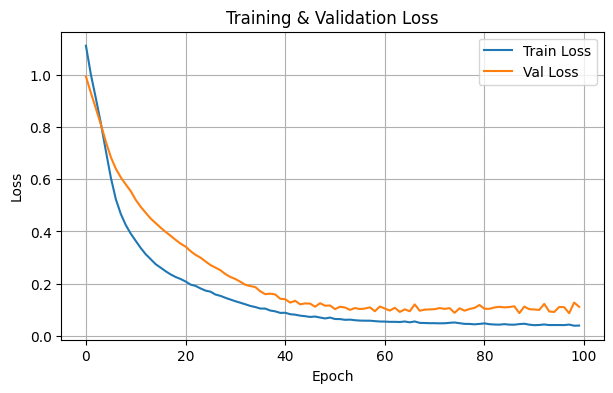

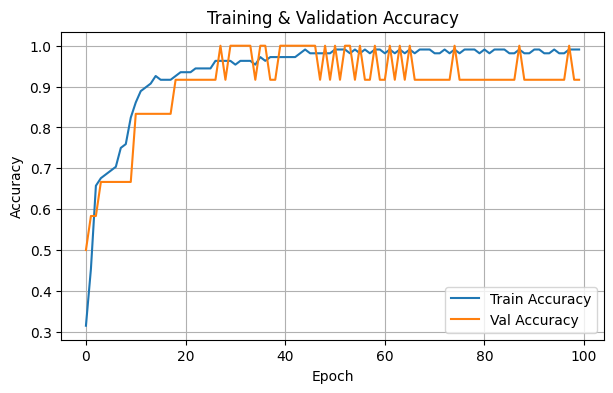

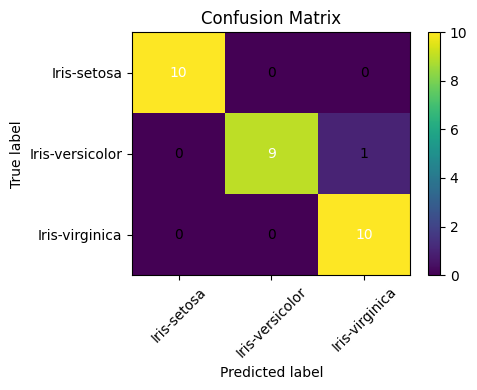


 Classification report table (precision, recall, f1-score, support):


precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   1.000000  0.900000  0.947368  10.000000
Iris-virginica    0.909091  1.000000  0.952381  10.000000
accuracy          0.966667  0.966667  0.966667   0.966667
macro avg         0.969697  0.966667  0.966583  30.000000
weighted avg      0.969697  0.966667  0.966583  30.000000


Summary metrics:
Accuracy:     0.9667
Macro F1:     0.9666
Weighted F1:  0.9666


In [9]:
# ============================================
# Feedforward Neural Network (MLP) on Iris
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# ------------------------
# 1. Load the Iris dataset 
# ------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"   # dataset path in Kaggle

data = pd.read_csv(FILE_PATH)

# Drop Id column if present
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
print("Shape:", data.shape)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nClass distribution:")
print(data["Species"].value_counts())

# --------------------------------------
# 2. Prepare features (X) and labels (y)
# --------------------------------------
X = data.drop("Species", axis=1).values      # 4 numeric features
y_species = data["Species"]                  # string labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels (3 classes)
binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)
num_classes = y_encoded.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded,
)

# -----------------------
# 3. Define the MLP model 
# -----------------------
input_dim = X_train.shape[1]  # 4 features

inputs = Input(shape=(input_dim,), name="Input_Layer")
x1 = Dense(16, activation="relu", name="Hidden_Layer_1")(inputs)
x2 = Dense(8, activation="relu", name="Hidden_Layer_2")(x1)
outputs = Dense(num_classes, activation="softmax", name="Output_Layer")(x2)

model = Model(inputs=inputs, outputs=outputs, name="Iris_MLP")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n--- Model Summary ---")
model.summary()

# Visualize the model architecture
try:
    plot_model(
        model,
        to_file="mlp_model.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
    )
    print("\n MLP architecture diagram:")
    display(Image(filename="mlp_model.png"))
except Exception as e:
    print("\nCould not plot model diagram:", e)

# -------------------------------------------------
# 4. Train the model & plot training curves
# -------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=4,
    validation_split=0.1,
    verbose=0,
)

history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(7, 4))
plt.plot(history_dict["loss"], label="Train Loss")
plt.plot(history_dict["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(7, 4))
plt.plot(history_dict["accuracy"], label="Train Accuracy")
plt.plot(history_dict["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# 5. Evaluation: confusion matrix + table 
# ---------------------------------------
# Convert one-hot y_test back to labels
y_test_labels = binarizer.inverse_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test, verbose=0)
y_pred_labels = binarizer.inverse_transform(y_pred_probs)

# Confusion matrix (sklearn)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=binarizer.classes_)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", aspect="auto")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(binarizer.classes_))
plt.xticks(tick_marks, binarizer.classes_, rotation=45)
plt.yticks(tick_marks, binarizer.classes_)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            str(cm[i, j]),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# Classification report (sklearn) as a table
report_dict = classification_report(
    y_test_labels, y_pred_labels, output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\n Classification report table (precision, recall, f1-score, support):")
display(report_df)

print("\nSummary metrics:")
print(f"Accuracy:     {report_dict['accuracy']:.4f}")
print(f"Macro F1:     {report_df.loc['macro avg', 'f1-score']:.4f}")
print(f"Weighted F1:  {report_df.loc['weighted avg', 'f1-score']:.4f}")


# FINAL TEST

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

print("Libraries Imported Successfully")


Libraries Imported Successfully


Shape: (150, 5)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


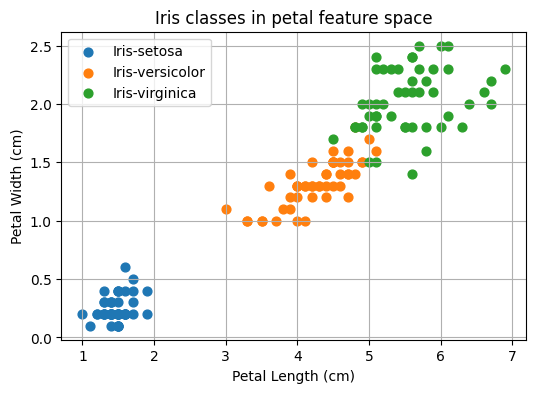

In [14]:
FILE_PATH = "/kaggle/input/iris/Iris.csv"
data = pd.read_csv(FILE_PATH)

if "Id" in data.columns:
    data = data.drop("Id", axis=1)

print("Shape:", data.shape)
display(data.head())
print("\nClass distribution:")
print(data["Species"].value_counts())

# Simple scatter plot for visual understanding
plt.figure(figsize=(6,4))
for species, color in zip(data["Species"].unique(),
                          ["red", "green", "blue"]):
    subset = data[data["Species"] == species]
    plt.scatter(subset["PetalLengthCm"],
                subset["PetalWidthCm"],
                label=species, s=40)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris classes in petal feature space")
plt.grid(True)
plt.legend()
plt.show()


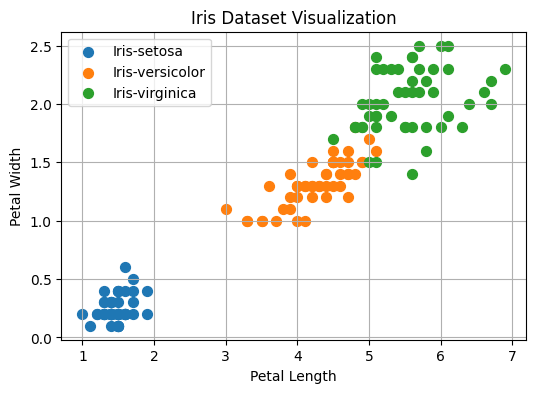

<Figure size 640x480 with 0 Axes>

In [21]:
# REMOVE FROM PPT → Use image only in presentation
save_path = "/kaggle/working/"
os.makedirs(save_path, exist_ok=True)
def save_fig(name): plt.savefig(f"{save_path}/{name}.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(6,4))
for species, color in zip(data["Species"].unique(),
                          ["red","green","blue"]):
    subset = data[data["Species"]==species]
    plt.scatter(subset["PetalLengthCm"], subset["PetalWidthCm"],
                label=species, s=50)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset Visualization")
plt.legend(); plt.grid(True); plt.show()

save_fig("iris_dataset_scatter")


In [22]:
X = data.drop("Species", axis=1).values
y_species = data["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y_species)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2,
    random_state=42, stratify=y_encoded)

print("Train Shape:", X_train.shape)
print("Test Shape :", X_test.shape)
print("Classes:", binarizer.classes_)


Train Shape: (120, 4)
Test Shape : (30, 4)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


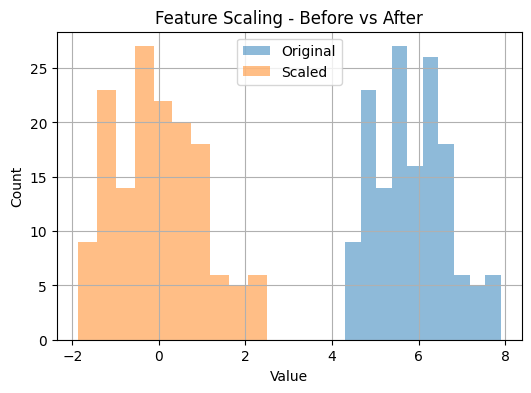

<Figure size 640x480 with 0 Axes>

In [23]:
# REMOVE FROM PPT → Use image only
plt.figure(figsize=(6,4))
plt.hist(X[:,0],alpha=0.5,label="Original")
plt.hist(X_scaled[:,0],alpha=0.5,label="Scaled")
plt.xlabel("Value"); plt.ylabel("Count")
plt.title("Feature Scaling - Before vs After")
plt.grid(True); plt.legend(); plt.show()

save_fig("feature_scaling_hist")


In [24]:
input_dim = X_train.shape[1]

inputs = Input(shape=(input_dim,))
x1 = Dense(10, activation="relu")(inputs)
x2 = Dense(8, activation="relu")(x1)
outputs = Dense(3, activation="softmax")(x2)

model = Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# REMOVE FROM PPT → Use exported image in slides
plot_model(model,to_file=f"{save_path}/model_architecture.png",
           show_shapes=True,show_layer_names=True,dpi=200)
print("Model Architecture Saved")


Model Architecture Saved


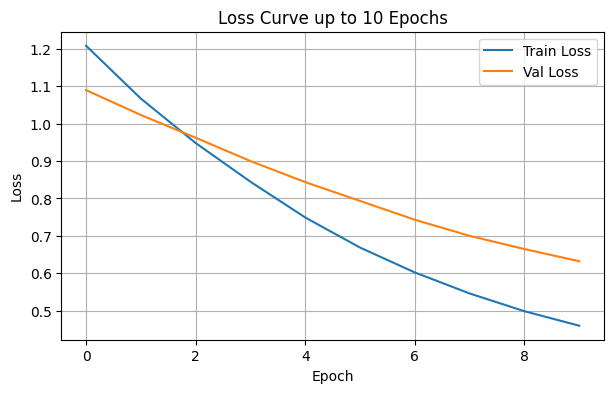

<Figure size 640x480 with 0 Axes>

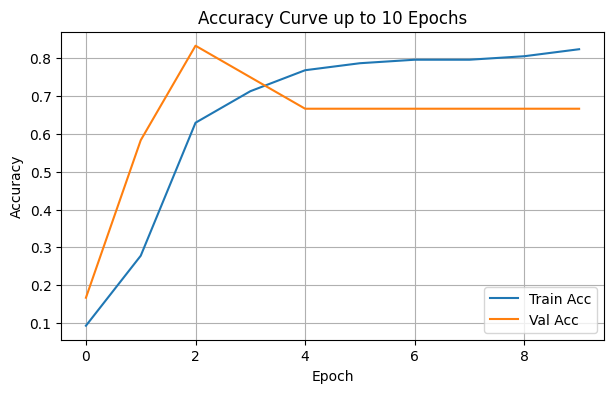

Saved Graphs for Epoch 10 



<Figure size 640x480 with 0 Axes>

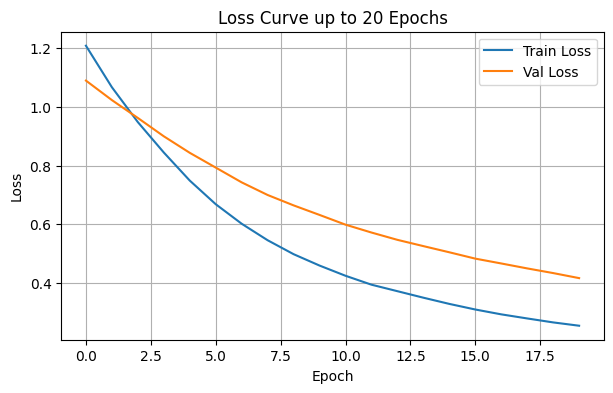

<Figure size 640x480 with 0 Axes>

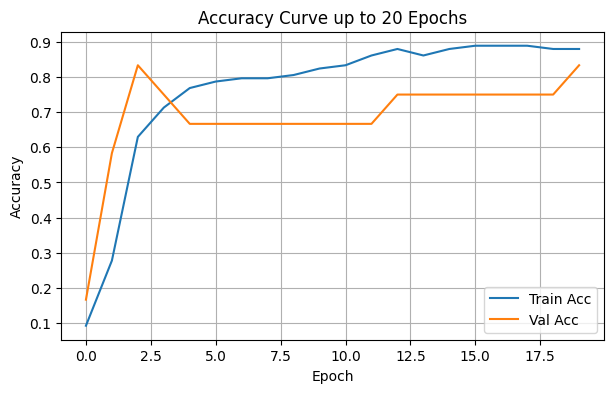

Saved Graphs for Epoch 20 



<Figure size 640x480 with 0 Axes>

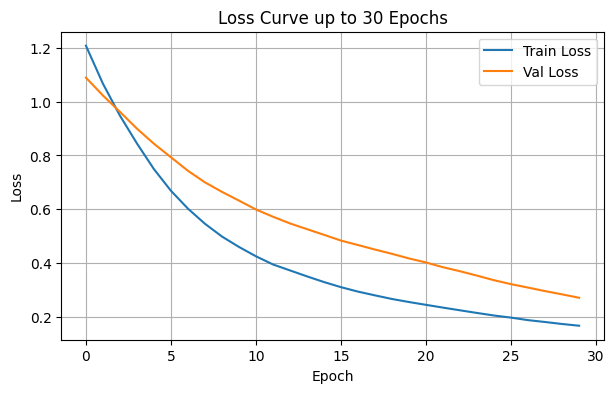

<Figure size 640x480 with 0 Axes>

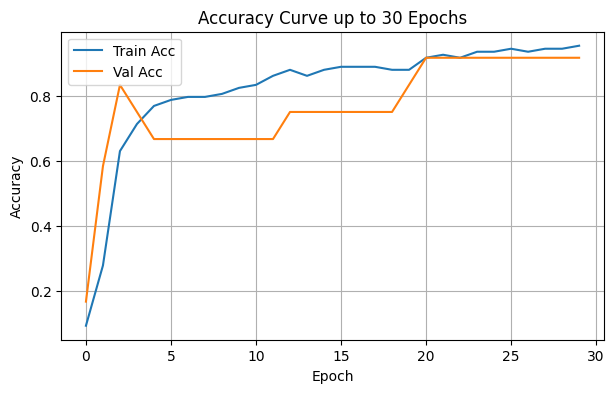

Saved Graphs for Epoch 30 



<Figure size 640x480 with 0 Axes>

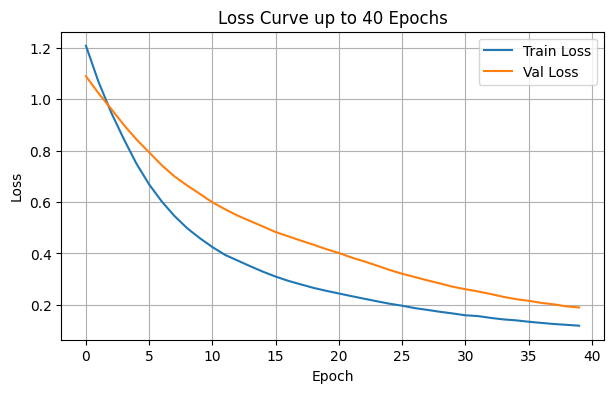

<Figure size 640x480 with 0 Axes>

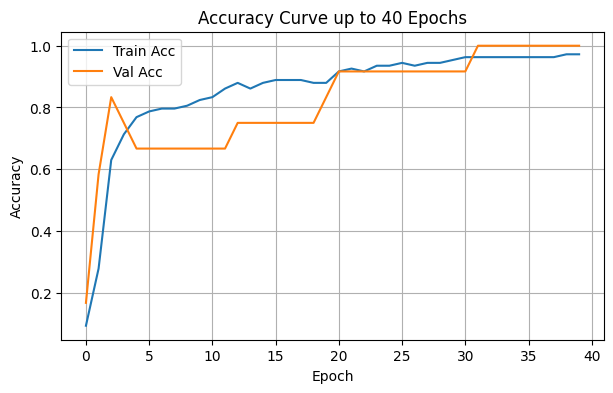

Saved Graphs for Epoch 40 



<Figure size 640x480 with 0 Axes>

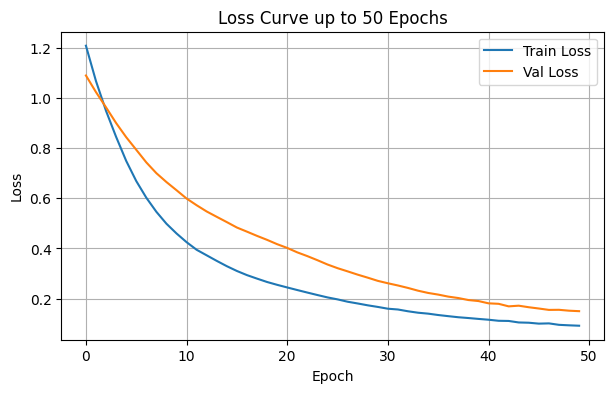

<Figure size 640x480 with 0 Axes>

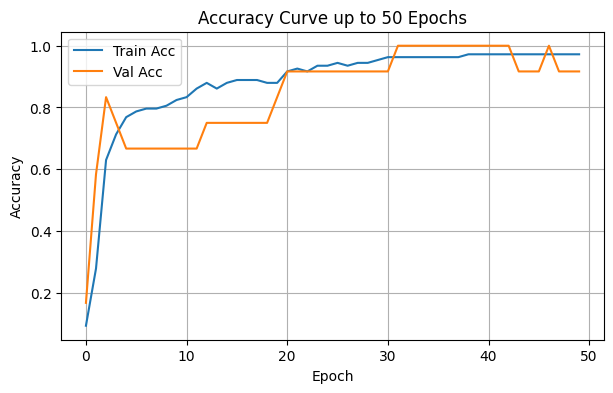

Saved Graphs for Epoch 50 



<Figure size 640x480 with 0 Axes>

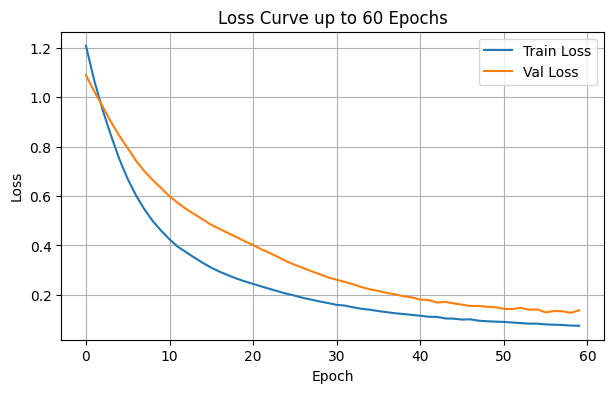

<Figure size 640x480 with 0 Axes>

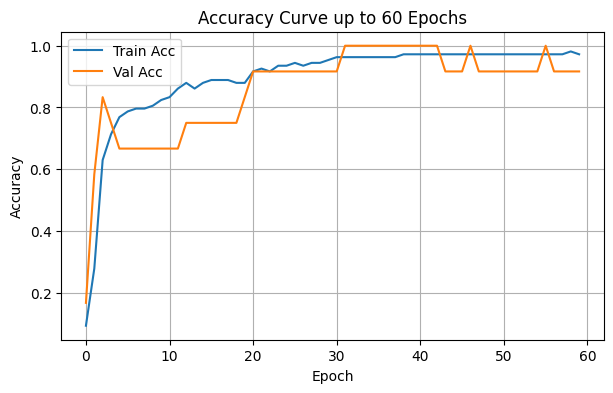

Saved Graphs for Epoch 60 



<Figure size 640x480 with 0 Axes>

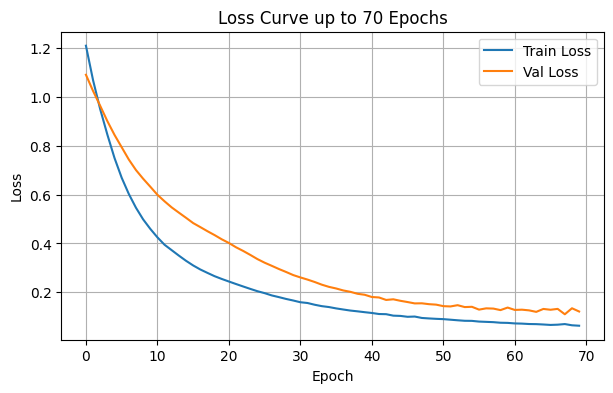

<Figure size 640x480 with 0 Axes>

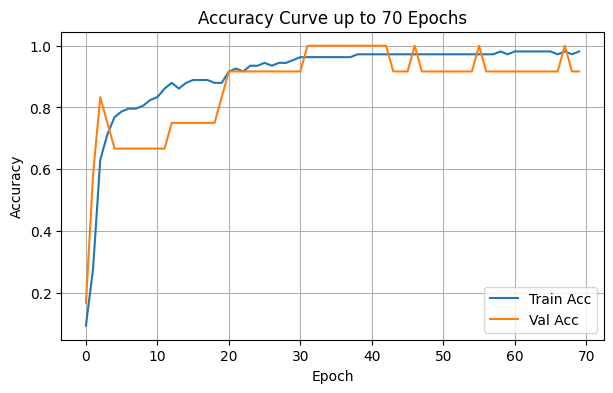

Saved Graphs for Epoch 70 



<Figure size 640x480 with 0 Axes>

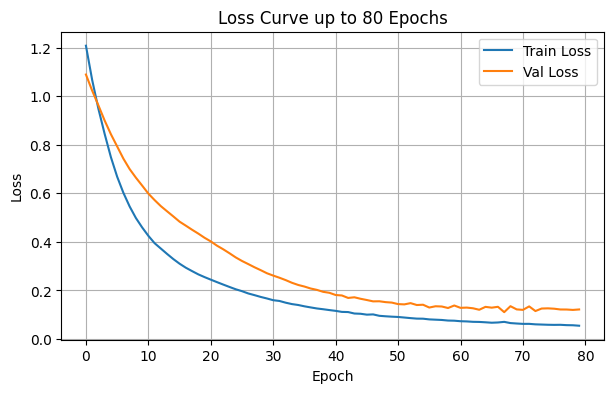

<Figure size 640x480 with 0 Axes>

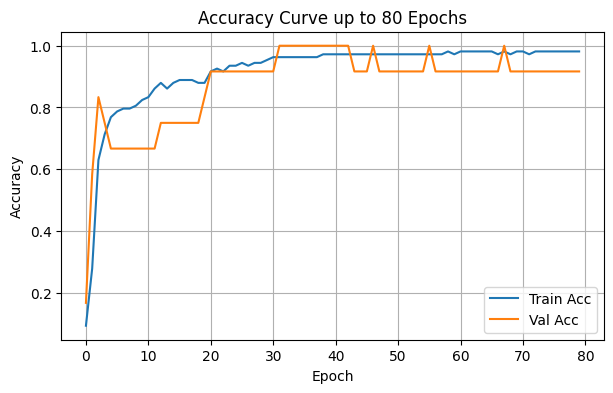

Saved Graphs for Epoch 80 



<Figure size 640x480 with 0 Axes>

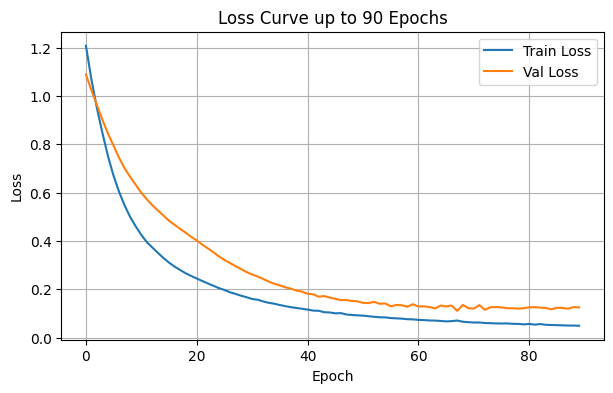

<Figure size 640x480 with 0 Axes>

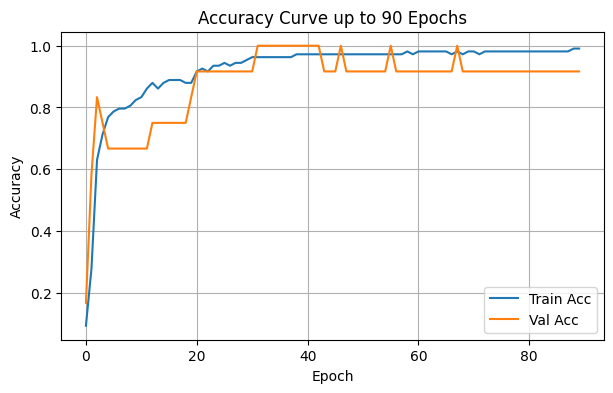

Saved Graphs for Epoch 90 



<Figure size 640x480 with 0 Axes>

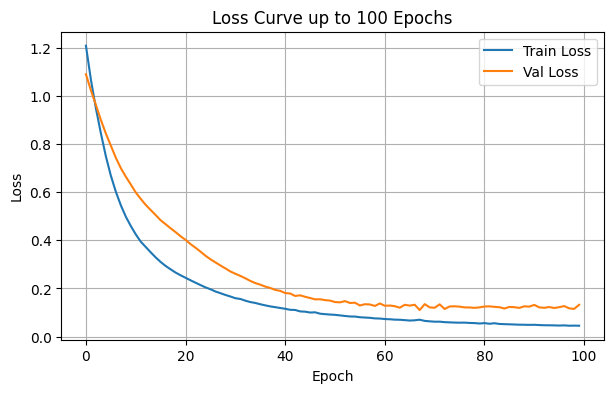

<Figure size 640x480 with 0 Axes>

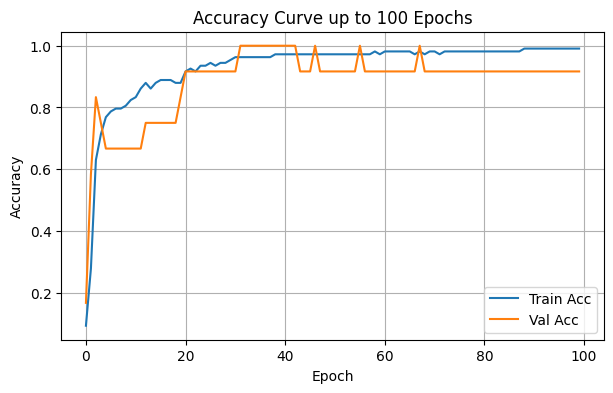

Saved Graphs for Epoch 100 



<Figure size 640x480 with 0 Axes>

In [26]:
# ============== Real-time Epoch Graph Saving ==============

epochs = 100
batch_size = 4
history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []

# train manually one epoch at a time so we can save graphs
for epoch in range(1, epochs+1):
    h = model.fit(
        X_train, y_train,
        epochs=1,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=0
    )

    # store metrics
    history_acc.append(h.history["accuracy"][0])
    history_val_acc.append(h.history["val_accuracy"][0])
    history_loss.append(h.history["loss"][0])
    history_val_loss.append(h.history["val_loss"][0])

    # ===== Save graph every 10 epochs =====
    if epoch % 10 == 0:
        # ---------------- LOSS PLOT ----------------
        plt.figure(figsize=(7,4))
        plt.plot(history_loss, label="Train Loss")
        plt.plot(history_val_loss, label="Val Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Loss Curve up to {epoch} Epochs")
        plt.grid(True)
        plt.legend()
        plt.show()
        save_fig(f"loss_step_{epoch}")     # file saved for animation

        # ---------------- ACCURACY PLOT ----------------
        plt.figure(figsize=(7,4))
        plt.plot(history_acc, label="Train Acc")
        plt.plot(history_val_acc, label="Val Acc")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy Curve up to {epoch} Epochs")
        plt.grid(True)
        plt.legend()
        plt.show()
        save_fig(f"accuracy_step_{epoch}")

        print(f"Saved Graphs for Epoch {epoch} \n")


In [29]:
y_test_labels = binarizer.inverse_transform(y_test)
y_pred = binarizer.inverse_transform(model.predict(X_test,verbose=0))

cm = confusion_matrix(y_test_labels,y_pred)
report = pd.DataFrame(classification_report(
    y_test_labels,y_pred,output_dict=True)).transpose()

print(report)


                 precision  recall  f1-score  support
Iris-setosa            1.0     1.0       1.0     10.0
Iris-versicolor        1.0     1.0       1.0     10.0
Iris-virginica         1.0     1.0       1.0     10.0
accuracy               1.0     1.0       1.0      1.0
macro avg              1.0     1.0       1.0     30.0
weighted avg           1.0     1.0       1.0     30.0


# FINAL CODE


Dataset Preview:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


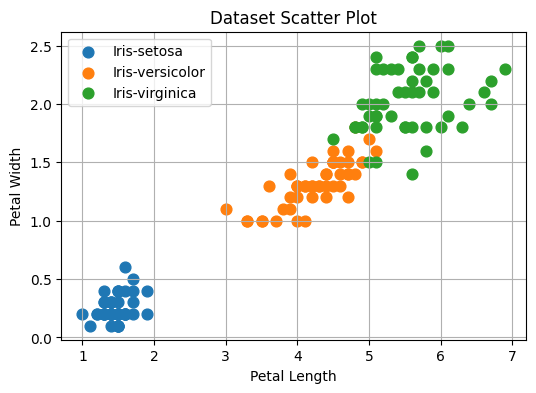

=> Saved: 0_scatter_plot.png

Train/Test Shapes:
X_train: (120, 4)  | X_test: (30, 4)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Figure size 640x480 with 0 Axes>

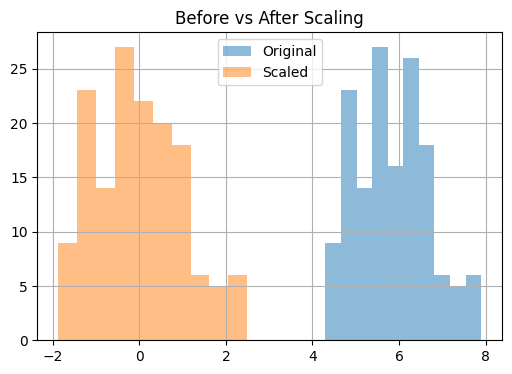

=> Saved: 1_scaling_difference.png

Model Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

=> Saved: model_architecture.png


<Figure size 640x480 with 0 Axes>

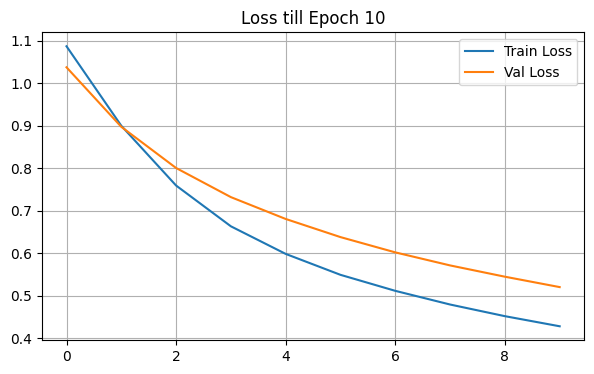

=> Saved: loss_until_epoch_10.png


<Figure size 640x480 with 0 Axes>

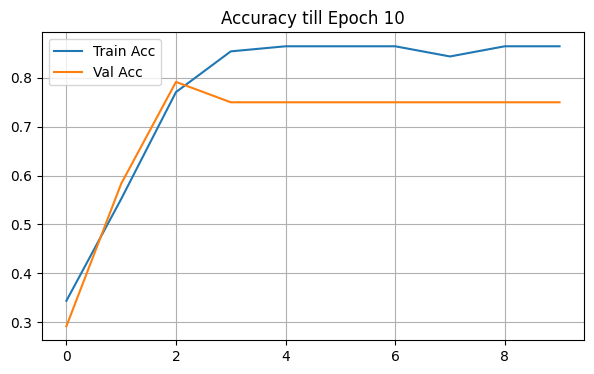

=> Saved: accuracy_until_epoch_10.png
Images saved for epoch 10



<Figure size 640x480 with 0 Axes>

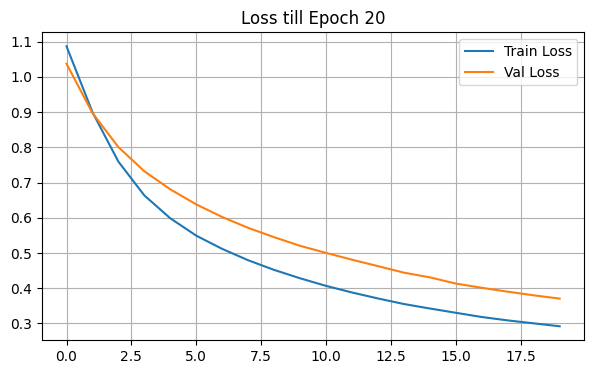

=> Saved: loss_until_epoch_20.png


<Figure size 640x480 with 0 Axes>

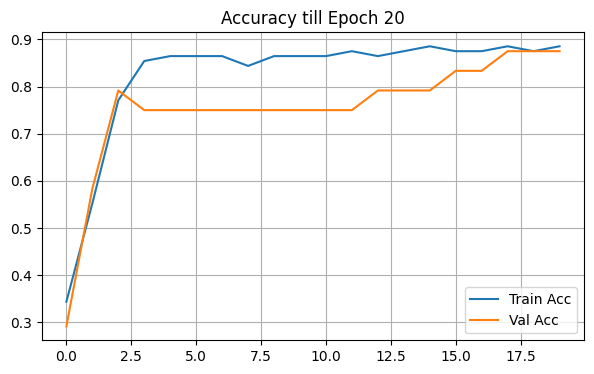

=> Saved: accuracy_until_epoch_20.png
Images saved for epoch 20



<Figure size 640x480 with 0 Axes>

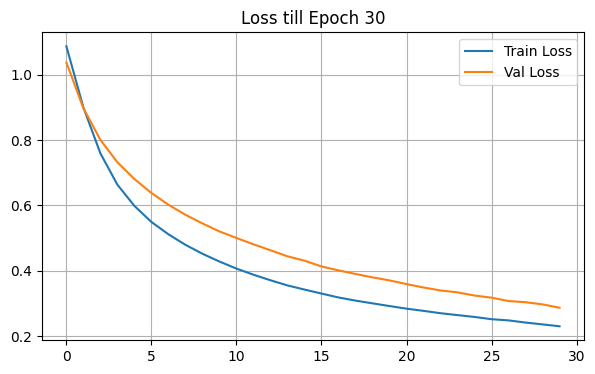

=> Saved: loss_until_epoch_30.png


<Figure size 640x480 with 0 Axes>

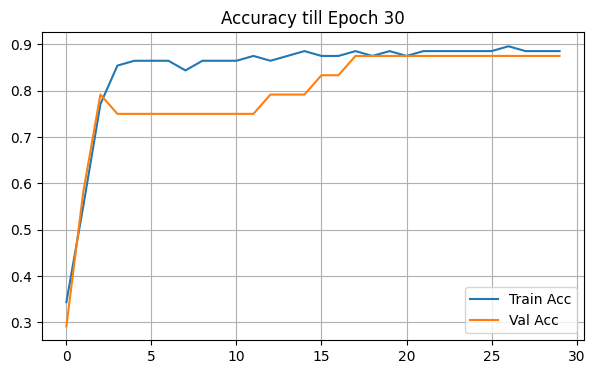

=> Saved: accuracy_until_epoch_30.png
Images saved for epoch 30



<Figure size 640x480 with 0 Axes>

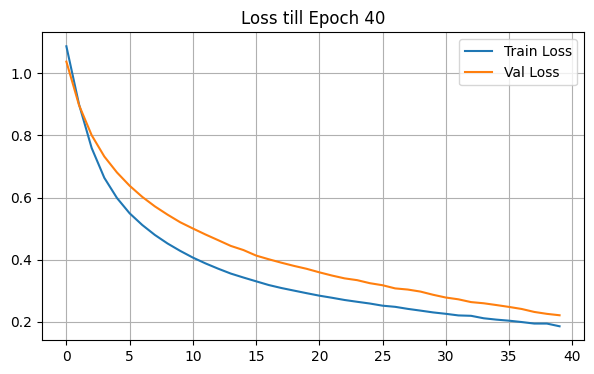

=> Saved: loss_until_epoch_40.png


<Figure size 640x480 with 0 Axes>

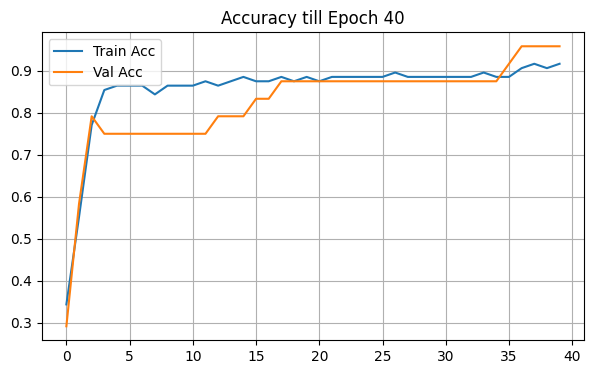

=> Saved: accuracy_until_epoch_40.png
Images saved for epoch 40



<Figure size 640x480 with 0 Axes>

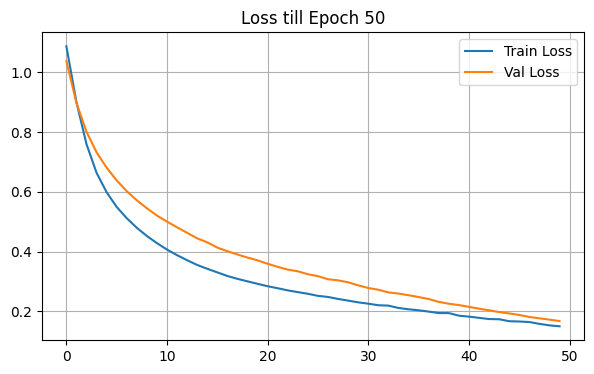

=> Saved: loss_until_epoch_50.png


<Figure size 640x480 with 0 Axes>

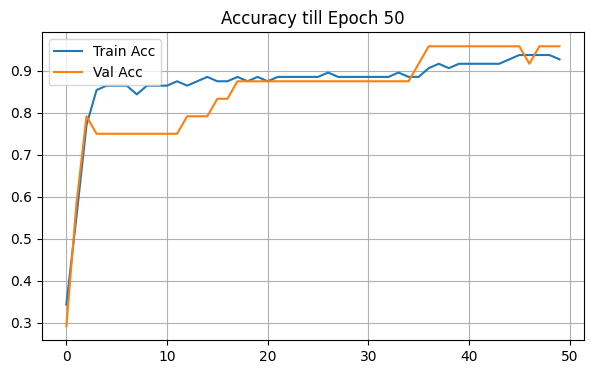

=> Saved: accuracy_until_epoch_50.png
Images saved for epoch 50



<Figure size 640x480 with 0 Axes>

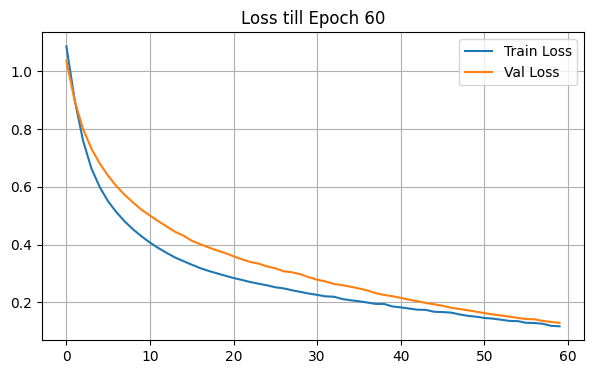

=> Saved: loss_until_epoch_60.png


<Figure size 640x480 with 0 Axes>

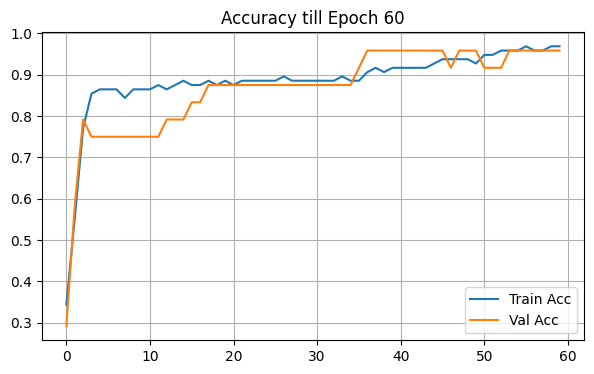

=> Saved: accuracy_until_epoch_60.png
Images saved for epoch 60



<Figure size 640x480 with 0 Axes>

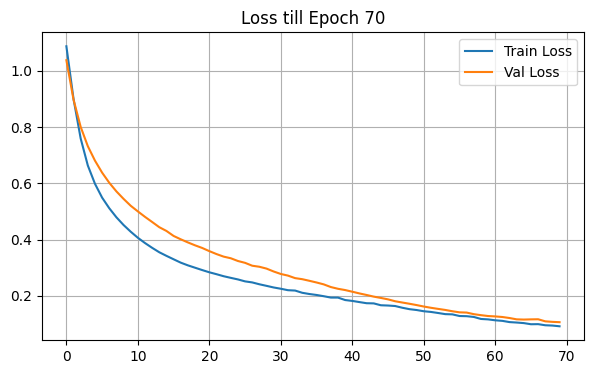

=> Saved: loss_until_epoch_70.png


<Figure size 640x480 with 0 Axes>

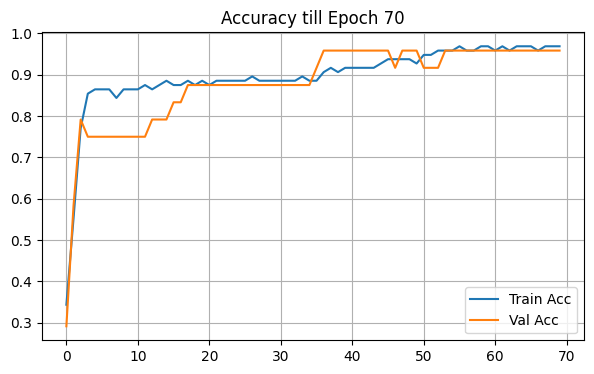

=> Saved: accuracy_until_epoch_70.png
Images saved for epoch 70



<Figure size 640x480 with 0 Axes>

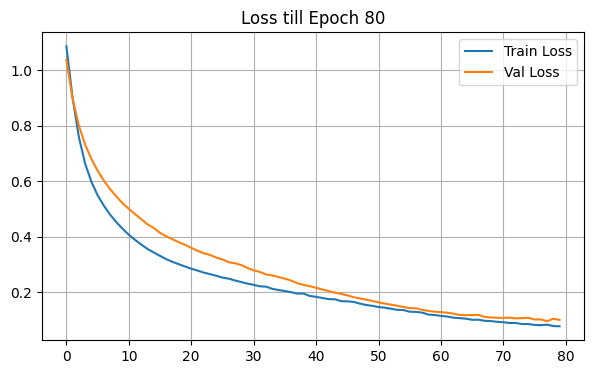

=> Saved: loss_until_epoch_80.png


<Figure size 640x480 with 0 Axes>

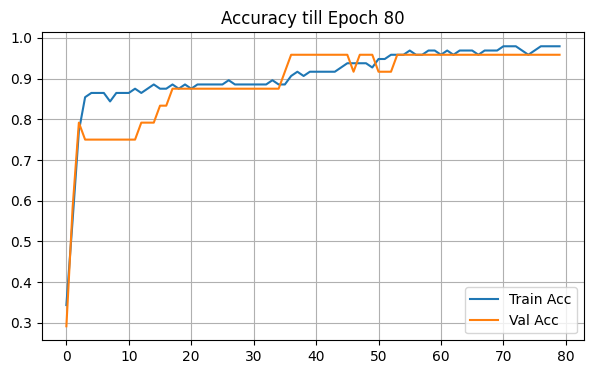

=> Saved: accuracy_until_epoch_80.png
Images saved for epoch 80



<Figure size 640x480 with 0 Axes>

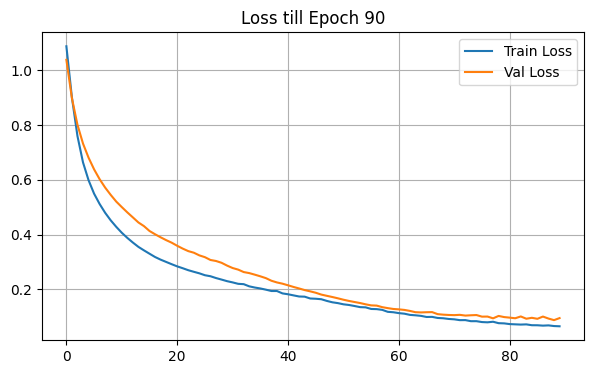

=> Saved: loss_until_epoch_90.png


<Figure size 640x480 with 0 Axes>

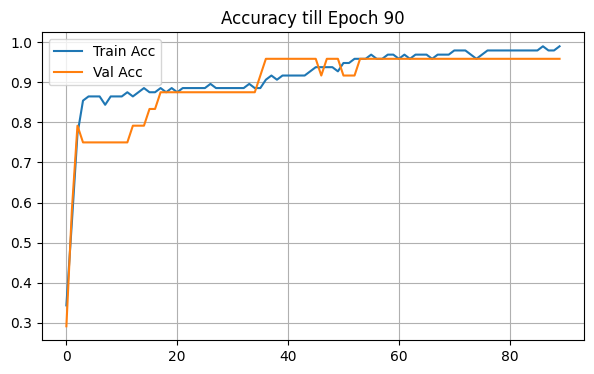

=> Saved: accuracy_until_epoch_90.png
Images saved for epoch 90



<Figure size 640x480 with 0 Axes>

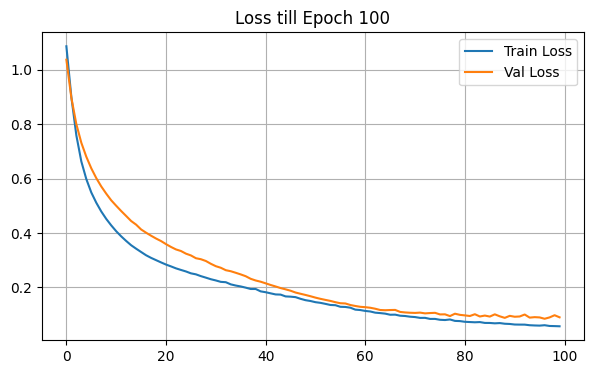

=> Saved: loss_until_epoch_100.png


<Figure size 640x480 with 0 Axes>

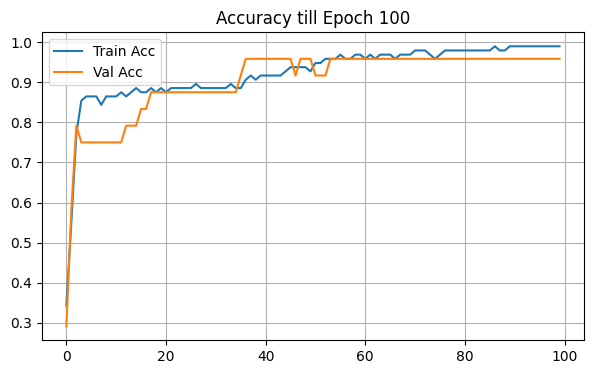

=> Saved: accuracy_until_epoch_100.png
Images saved for epoch 100


🎉 Training Complete!
All stage graphs saved.

Classification Report:


precision    recall  f1-score    support
Iris-setosa       1.000000  0.900000  0.947368  10.000000
Iris-versicolor   0.909091  1.000000  0.952381  10.000000
Iris-virginica    1.000000  1.000000  1.000000  10.000000
accuracy          0.966667  0.966667  0.966667   0.966667
macro avg         0.969697  0.966667  0.966583  30.000000
weighted avg      0.969697  0.966667  0.966583  30.000000

<Figure size 640x480 with 0 Axes>

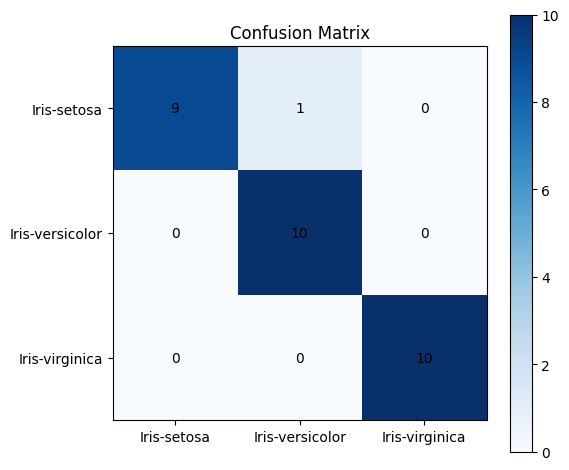

=> Saved: final_confusion_matrix.png

📌 All graphs available inside: /kaggle/working/mlp_images/


<Figure size 640x480 with 0 Axes>

In [34]:
# ===============================================
# IRIS MLP Neural Network with step-wise graph saving
# Creates images every 10 epochs (for animation/PPT)
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import display, Image

# -------------------------------------------------
# Create folder for all PPT images
# -------------------------------------------------
save_path = "/kaggle/working/mlp_images"
os.makedirs(save_path, exist_ok=True)

def save_fig(name):
    plt.savefig(f"{save_path}/{name}.png", dpi=300, bbox_inches="tight")
    print(f"=> Saved: {name}.png")

# -------------------------------------------------
# Load Dataset
# -------------------------------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"
data = pd.read_csv(FILE_PATH)

if "Id" in data.columns:
    data = data.drop("Id", axis=1)

print("\nDataset Preview:")
display(data.head())
print("\nClass Distribution:")
print(data["Species"].value_counts())

# -------------------------------------------------
# Visualize Dataset (Scatter)
# -------------------------------------------------
plt.figure(figsize=(6,4))
for species, color in zip(data["Species"].unique(), ["red","green","blue"]):
    subset = data[data["Species"]==species]
    plt.scatter(subset["PetalLengthCm"], subset["PetalWidthCm"], label=species, s=60)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Dataset Scatter Plot")
plt.legend(); plt.grid(True); plt.show()
save_fig("0_scatter_plot")

# -------------------------------------------------
# Preprocessing Scaling & Encoding
# -------------------------------------------------
X = data.drop("Species", axis=1).values
y = data["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

print("\nTrain/Test Shapes:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("Classes:", binarizer.classes_)

# Scaling Visual
plt.figure(figsize=(6,4))
plt.hist(X[:,0], alpha=0.5, label="Original")
plt.hist(X_scaled[:,0], alpha=0.5, label="Scaled")
plt.title("Before vs After Scaling")
plt.legend(); plt.grid(True); plt.show()
save_fig("1_scaling_difference")

# -------------------------------------------------
# Model Creation
# -------------------------------------------------
inputs = Input(shape=(4,))
x = Dense(10, activation="relu")(inputs)
x = Dense(8, activation="relu")(x)
outputs = Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("\nModel Summary:")
model.summary()

plot_model(model, to_file=f"{save_path}/model_architecture.png",
           show_shapes=True, dpi=150)
print("=> Saved: model_architecture.png")

# -------------------------------------------------
# Training with per-10-epoch plotting
# -------------------------------------------------
epochs = 100
batch = 4

history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []

for epoch in range(1, epochs+1):
    h = model.fit(X_train, y_train,
                  epochs=1,
                  batch_size=batch,
                  validation_split=0.2,
                  verbose=0)

    # Store progress
    history_acc.append(h.history['accuracy'][0])
    history_val_acc.append(h.history['val_accuracy'][0])
    history_loss.append(h.history['loss'][0])
    history_val_loss.append(h.history['val_loss'][0])

    # Save progression graphs every 10 epochs
    if epoch % 10 == 0:

        # Loss plot
        plt.figure(figsize=(7,4))
        plt.plot(history_loss,label="Train Loss")
        plt.plot(history_val_loss,label="Val Loss")
        plt.title(f"Loss till Epoch {epoch}")
        plt.legend(); plt.grid(True); plt.show()
        save_fig(f"loss_until_epoch_{epoch}")

        # Accuracy plot
        plt.figure(figsize=(7,4))
        plt.plot(history_acc,label="Train Acc")
        plt.plot(history_val_acc,label="Val Acc")
        plt.title(f"Accuracy till Epoch {epoch}")
        plt.legend(); plt.grid(True); plt.show()
        save_fig(f"accuracy_until_epoch_{epoch}")

        print(f"Images saved for epoch {epoch}\n")

print("\n🎉 Training Complete!\nAll stage graphs saved.")

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
y_true = binarizer.inverse_transform(y_test)
y_pred = binarizer.inverse_transform(model.predict(X_test,verbose=0))

print("\nClassification Report:")
report = pd.DataFrame(classification_report(y_true,y_pred,output_dict=True)).transpose()
display(report)

# Confusion Matrix
cm = confusion_matrix(y_true,y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm,cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks(np.arange(3),binarizer.classes_)
plt.yticks(np.arange(3),binarizer.classes_)
for i in range(3):
    for j in range(3):
        plt.text(j,i,str(cm[i,j]),ha='center',va='center')
plt.colorbar(); plt.tight_layout(); plt.show()
save_fig("final_confusion_matrix")

print("\n📌 All graphs available inside: /kaggle/working/mlp_images/")


2025-12-04 10:53:31.638093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764845611.867419      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764845611.940562      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'


Dataset Preview:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


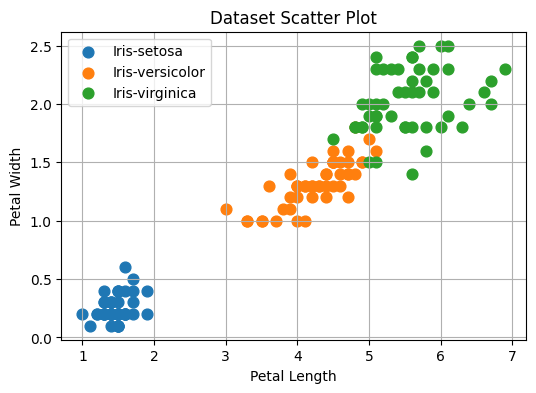

=> Saved: 0_scatter_plot.png

Train/Test Shapes:
X_train: (120, 4)  | X_test: (30, 4)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Figure size 640x480 with 0 Axes>

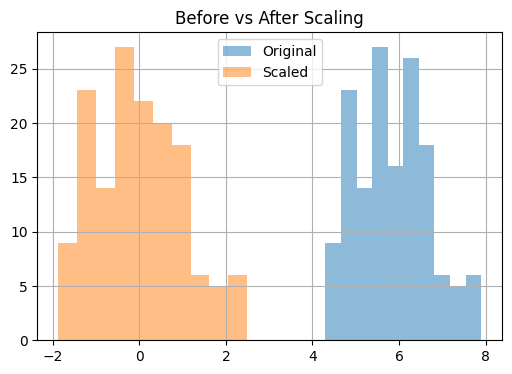

=> Saved: 1_scaling_difference.png

Model Summary:


2025-12-04 10:53:49.931763: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

=> Saved: model_architecture.png


<Figure size 640x480 with 0 Axes>

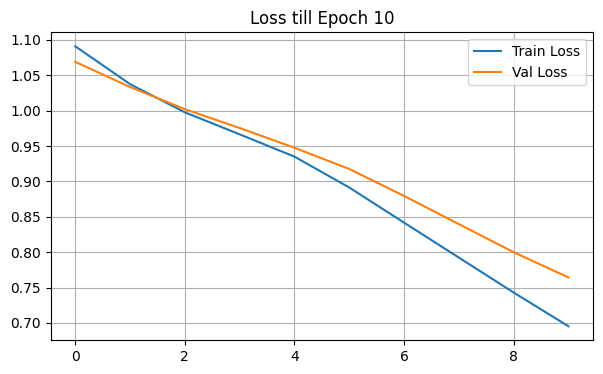

=> Saved: loss_until_epoch_10.png


<Figure size 640x480 with 0 Axes>

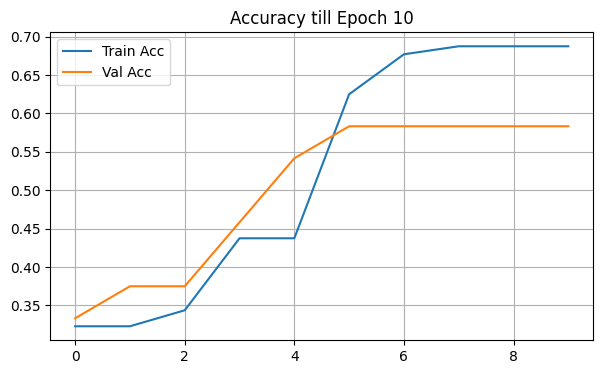

=> Saved: accuracy_until_epoch_10.png


<Figure size 640x480 with 0 Axes>

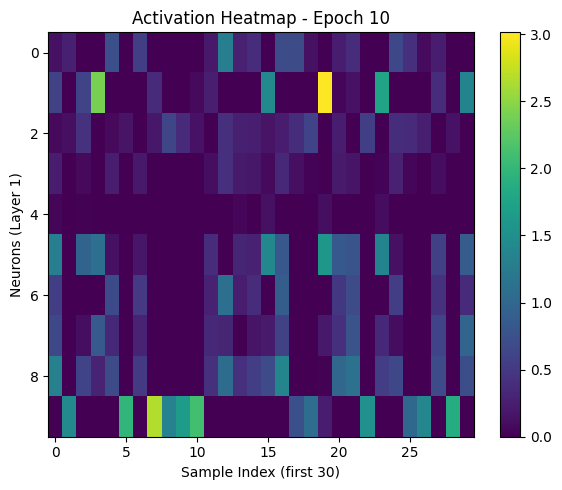

=> Saved: activation_epoch_10.png
Images saved for epoch 10 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

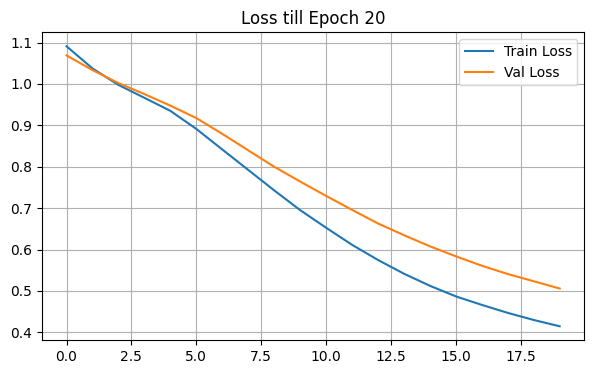

=> Saved: loss_until_epoch_20.png


<Figure size 640x480 with 0 Axes>

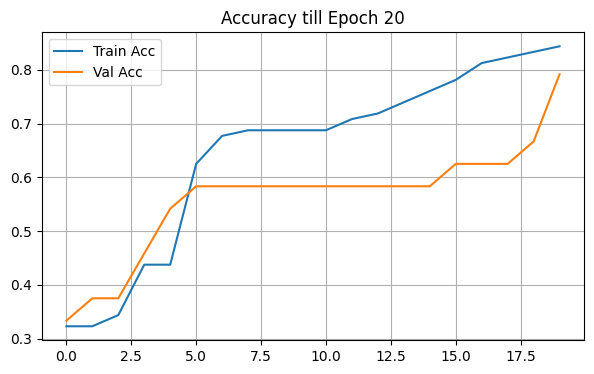

=> Saved: accuracy_until_epoch_20.png


<Figure size 640x480 with 0 Axes>

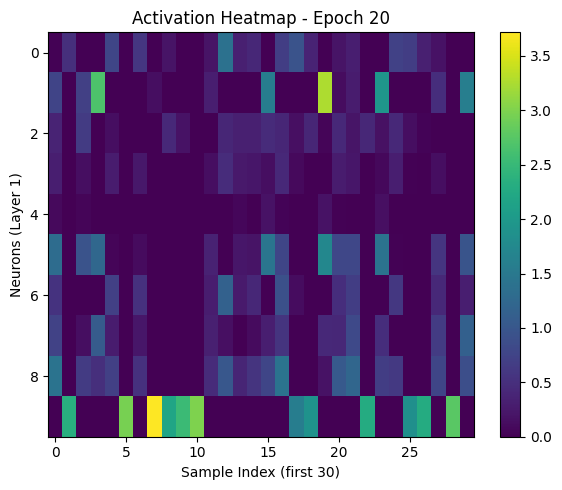

=> Saved: activation_epoch_20.png
Images saved for epoch 20 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

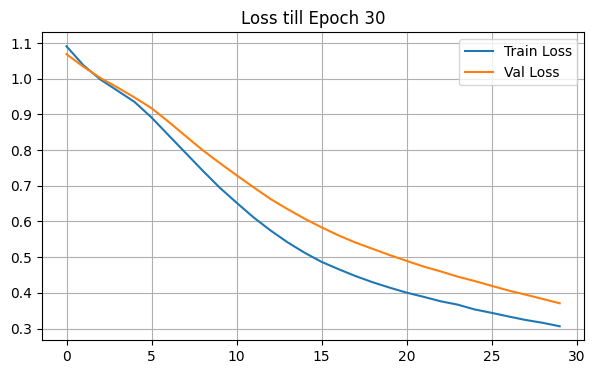

=> Saved: loss_until_epoch_30.png


<Figure size 640x480 with 0 Axes>

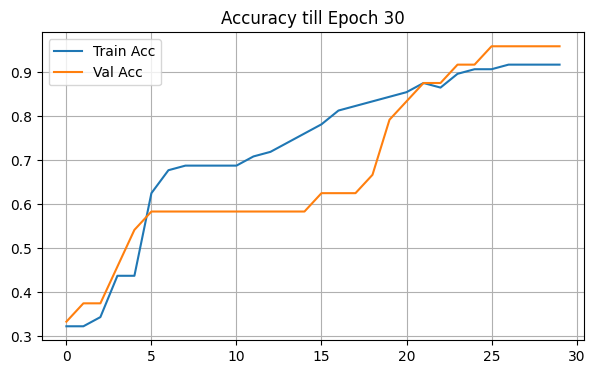

=> Saved: accuracy_until_epoch_30.png


<Figure size 640x480 with 0 Axes>

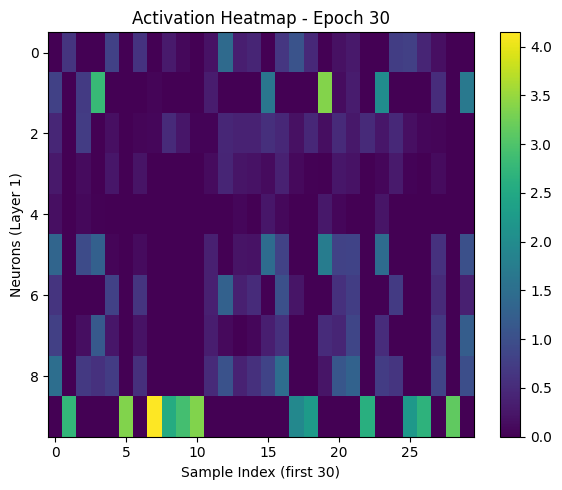

=> Saved: activation_epoch_30.png
Images saved for epoch 30 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

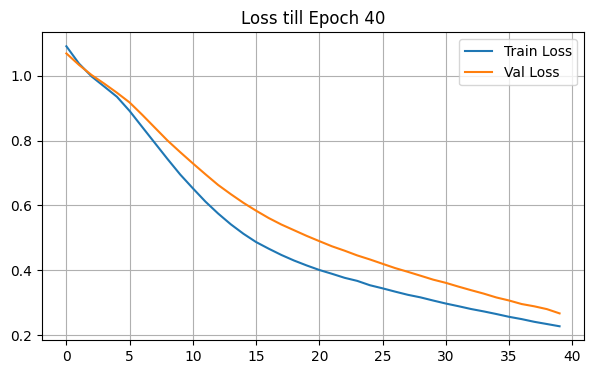

=> Saved: loss_until_epoch_40.png


<Figure size 640x480 with 0 Axes>

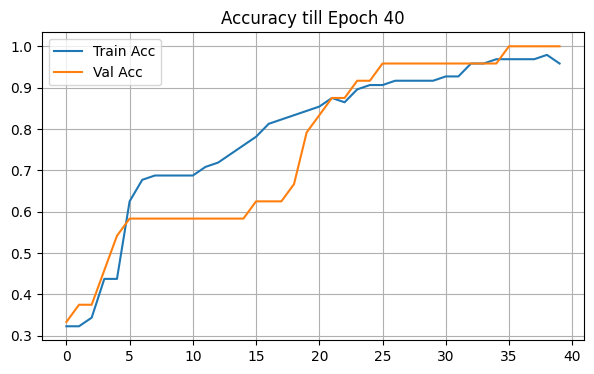

=> Saved: accuracy_until_epoch_40.png


<Figure size 640x480 with 0 Axes>

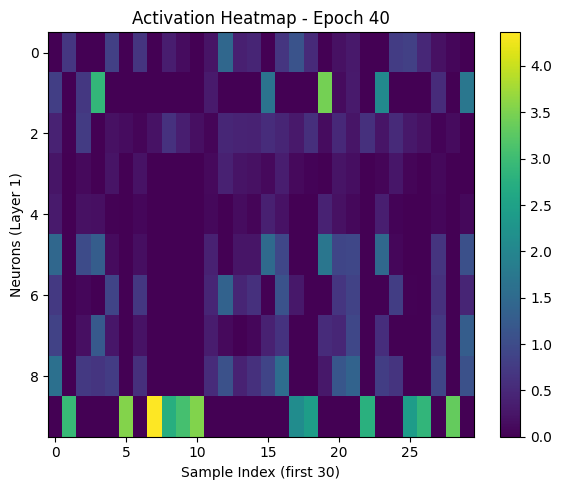

=> Saved: activation_epoch_40.png
Images saved for epoch 40 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

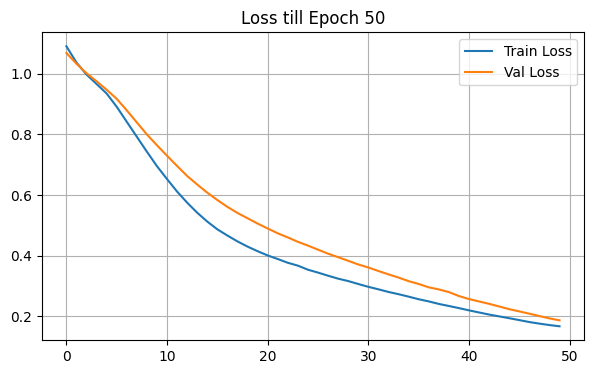

=> Saved: loss_until_epoch_50.png


<Figure size 640x480 with 0 Axes>

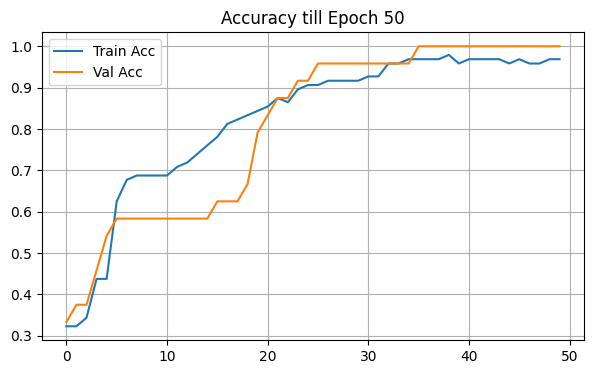

=> Saved: accuracy_until_epoch_50.png


<Figure size 640x480 with 0 Axes>

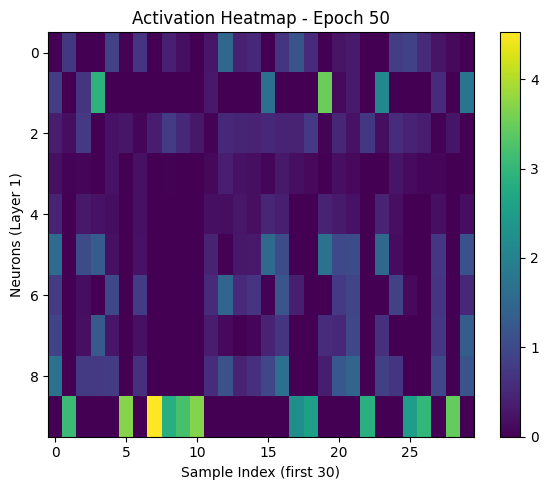

=> Saved: activation_epoch_50.png
Images saved for epoch 50 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

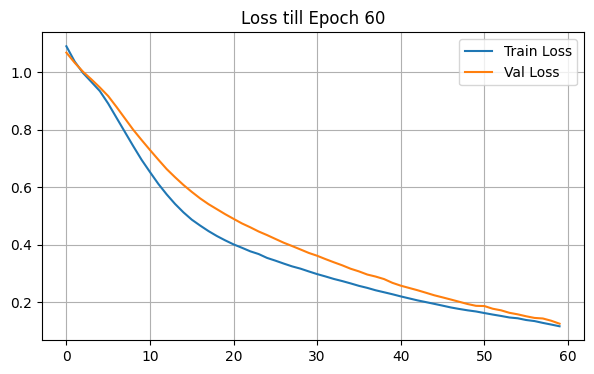

=> Saved: loss_until_epoch_60.png


<Figure size 640x480 with 0 Axes>

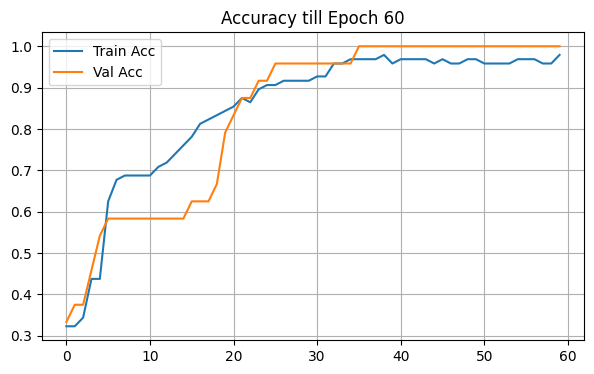

=> Saved: accuracy_until_epoch_60.png


<Figure size 640x480 with 0 Axes>

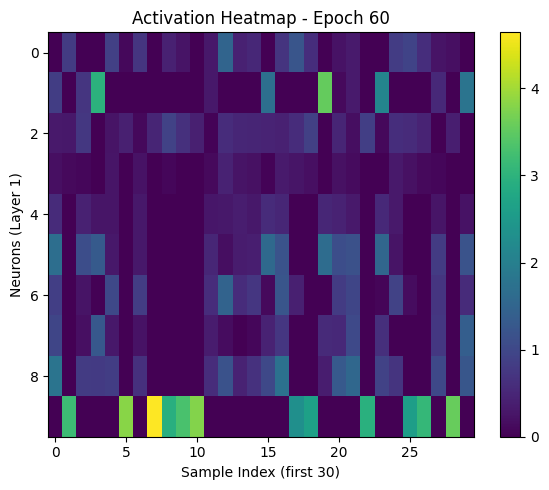

=> Saved: activation_epoch_60.png
Images saved for epoch 60 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

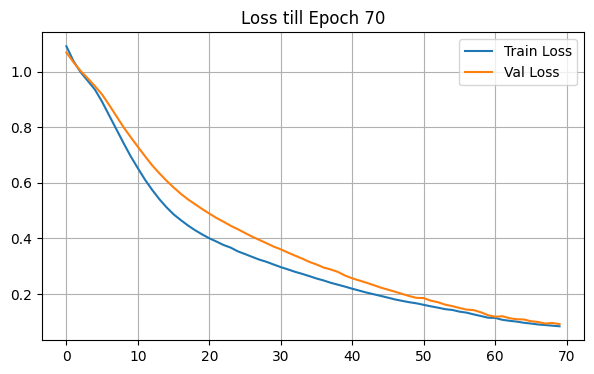

=> Saved: loss_until_epoch_70.png


<Figure size 640x480 with 0 Axes>

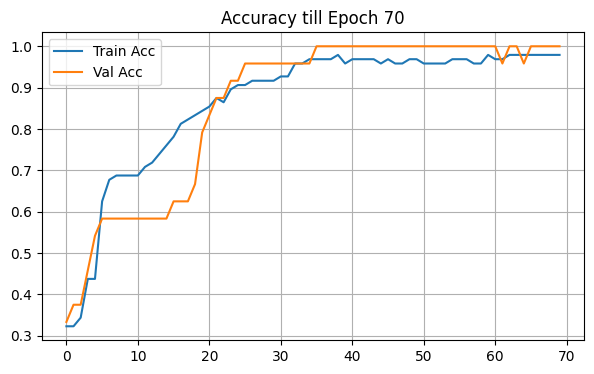

=> Saved: accuracy_until_epoch_70.png


<Figure size 640x480 with 0 Axes>

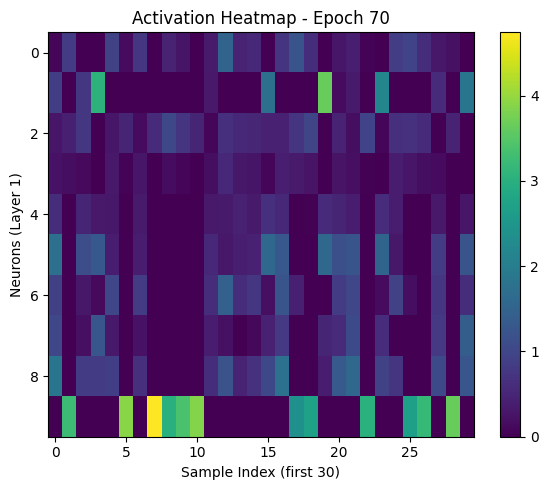

=> Saved: activation_epoch_70.png
Images saved for epoch 70 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

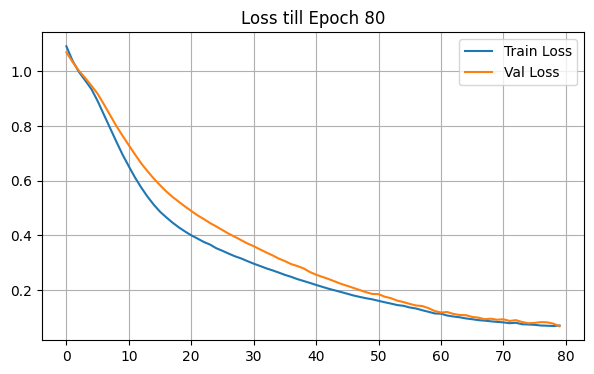

=> Saved: loss_until_epoch_80.png


<Figure size 640x480 with 0 Axes>

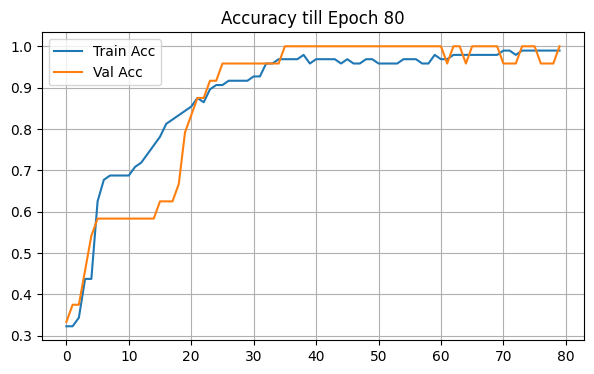

=> Saved: accuracy_until_epoch_80.png


<Figure size 640x480 with 0 Axes>

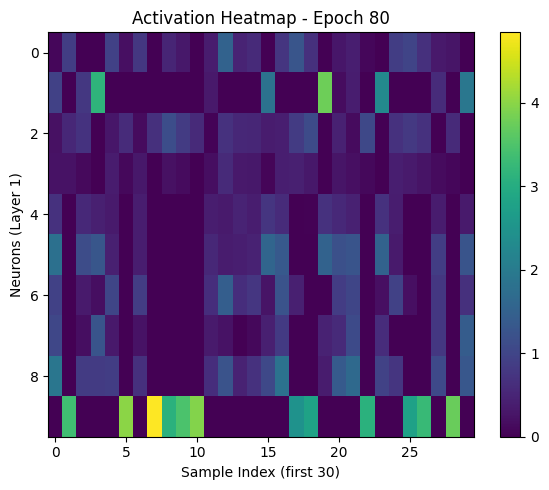

=> Saved: activation_epoch_80.png
Images saved for epoch 80 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

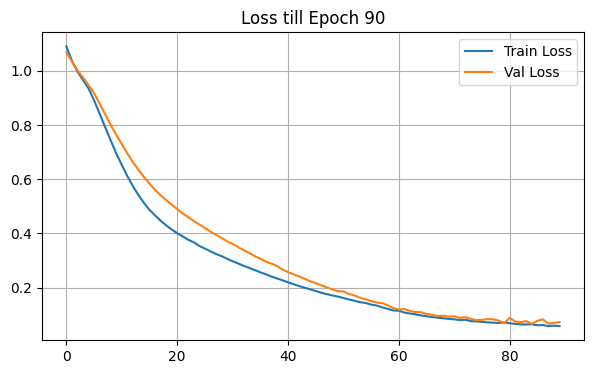

=> Saved: loss_until_epoch_90.png


<Figure size 640x480 with 0 Axes>

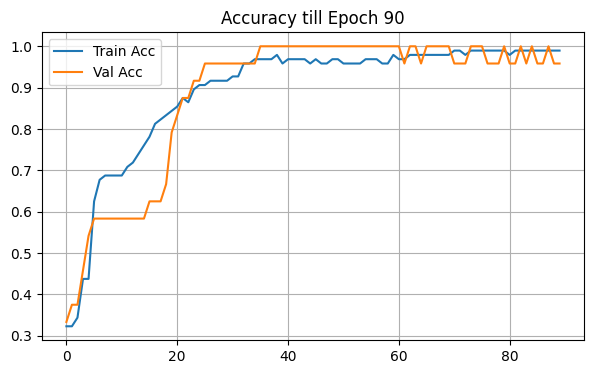

=> Saved: accuracy_until_epoch_90.png


<Figure size 640x480 with 0 Axes>

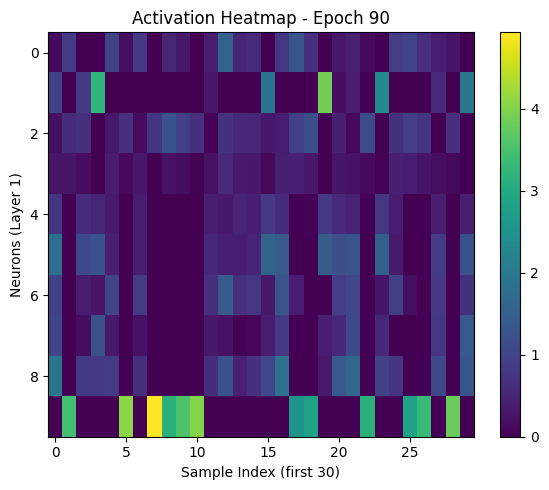

=> Saved: activation_epoch_90.png
Images saved for epoch 90 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

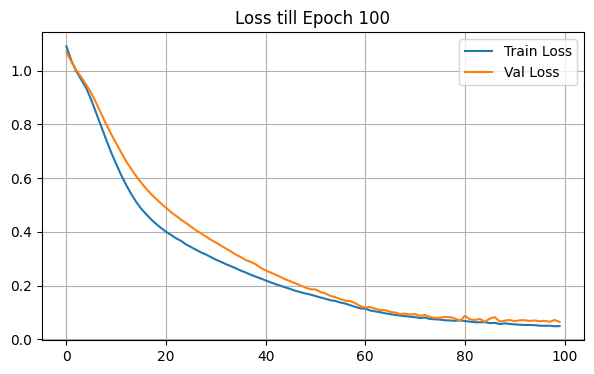

=> Saved: loss_until_epoch_100.png


<Figure size 640x480 with 0 Axes>

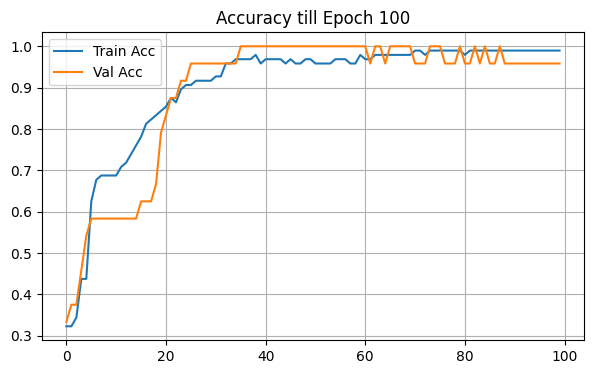

=> Saved: accuracy_until_epoch_100.png


<Figure size 640x480 with 0 Axes>

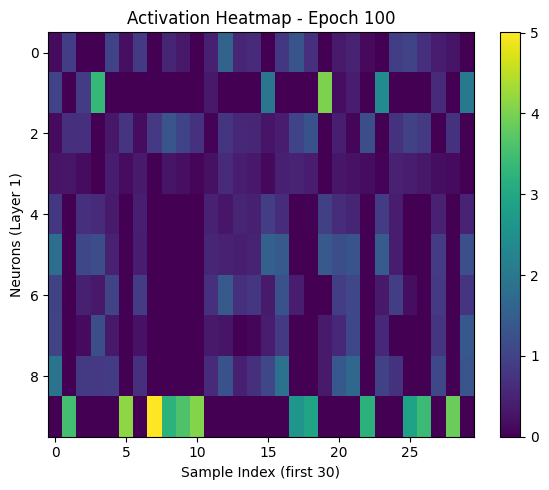

=> Saved: activation_epoch_100.png
Images saved for epoch 100 (Loss, Accuracy, Activation)


🎉 Training Complete!
All stage graphs saved.

Classification Report:


precision    recall  f1-score    support
Iris-setosa       1.000000  0.900000  0.947368  10.000000
Iris-versicolor   0.900000  0.900000  0.900000  10.000000
Iris-virginica    0.909091  1.000000  0.952381  10.000000
accuracy          0.933333  0.933333  0.933333   0.933333
macro avg         0.936364  0.933333  0.933250  30.000000
weighted avg      0.936364  0.933333  0.933250  30.000000

<Figure size 640x480 with 0 Axes>

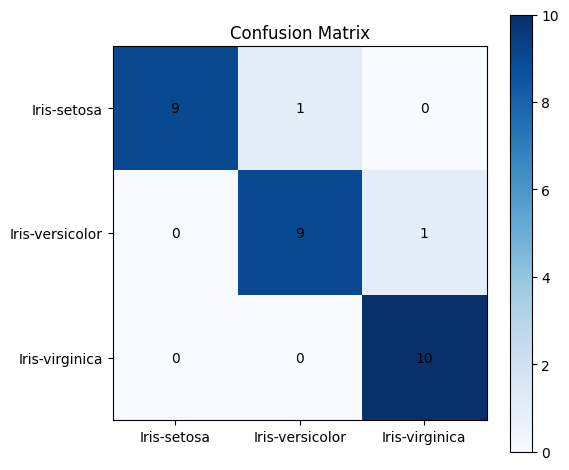

=> Saved: final_confusion_matrix.png

📌 All graphs available inside: /kaggle/working/mlp_images/


<Figure size 640x480 with 0 Axes>

In [1]:
# ===============================================
# IRIS MLP Neural Network with step-wise graph saving
# Creates images every 10 epochs (for animation/PPT)
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from IPython.display import display, Image

# -------------------------------------------------
# Create folder for all PPT images
# -------------------------------------------------
save_path = "/kaggle/working/mlp_images"
os.makedirs(save_path, exist_ok=True)

def save_fig(name):
    plt.savefig(f"{save_path}/{name}.png", dpi=300, bbox_inches="tight")
    print(f"=> Saved: {name}.png")

# -------------------------------------------------
# Load Dataset
# -------------------------------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"
data = pd.read_csv(FILE_PATH)

if "Id" in data.columns:
    data = data.drop("Id", axis=1)

print("\nDataset Preview:")
display(data.head())
print("\nClass Distribution:")
print(data["Species"].value_counts())

# -------------------------------------------------
# Visualize Dataset (Scatter)
# -------------------------------------------------
plt.figure(figsize=(6,4))
for species, color in zip(data["Species"].unique(), ["red","green","blue"]):
    subset = data[data["Species"]==species]
    plt.scatter(subset["PetalLengthCm"], subset["PetalWidthCm"], label=species, s=60)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Dataset Scatter Plot")
plt.legend(); plt.grid(True); plt.show()
save_fig("0_scatter_plot")

# -------------------------------------------------
# Preprocessing Scaling & Encoding
# -------------------------------------------------
X = data.drop("Species", axis=1).values
y = data["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

print("\nTrain/Test Shapes:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("Classes:", binarizer.classes_)

# Scaling Visual
plt.figure(figsize=(6,4))
plt.hist(X[:,0], alpha=0.5, label="Original")
plt.hist(X_scaled[:,0], alpha=0.5, label="Scaled")
plt.title("Before vs After Scaling")
plt.legend(); plt.grid(True); plt.show()
save_fig("1_scaling_difference")

# -------------------------------------------------
# Model Creation
# -------------------------------------------------
inputs = Input(shape=(4,))
x = Dense(10, activation="relu")(inputs)
x = Dense(8, activation="relu")(x)
outputs = Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("\nModel Summary:")
model.summary()

plot_model(model, to_file=f"{save_path}/model_architecture.png",
           show_shapes=True, dpi=150)
print("=> Saved: model_architecture.png")

# -------------------------------------------------
# Training with per-10-epoch plotting + ACTIVATION MAP
# -------------------------------------------------
epochs = 100
batch = 4

history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []

# Model to extract activations from hidden layer 1
activation_model = Model(inputs=model.input, outputs=model.layers[1].output)

for epoch in range(1, epochs+1):
    h = model.fit(X_train, y_train,
                  epochs=1,
                  batch_size=batch,
                  validation_split=0.2,
                  verbose=0)

    # Store progress
    history_acc.append(h.history['accuracy'][0])
    history_val_acc.append(h.history['val_accuracy'][0])
    history_loss.append(h.history['loss'][0])
    history_val_loss.append(h.history['val_loss'][0])

    # Save progression graphs every 10 epochs
    if epoch % 10 == 0:

        # ---------------- LOSS PLOT ----------------
        plt.figure(figsize=(7,4))
        plt.plot(history_loss,label="Train Loss")
        plt.plot(history_val_loss,label="Val Loss")
        plt.title(f"Loss till Epoch {epoch}")
        plt.legend(); plt.grid(True); plt.show()
        save_fig(f"loss_until_epoch_{epoch}")

        # ---------------- ACCURACY PLOT ----------------
        plt.figure(figsize=(7,4))
        plt.plot(history_acc,label="Train Acc")
        plt.plot(history_val_acc,label="Val Acc")
        plt.title(f"Accuracy till Epoch {epoch}")
        plt.legend(); plt.grid(True); plt.show()
        save_fig(f"accuracy_until_epoch_{epoch}")

        # ---------------- ACTIVATION MAP ----------------
        # Take first 30 samples to visualize neuron activity evolution
        activations = activation_model.predict(X_train[:30], verbose=0)

        plt.figure(figsize=(6,5))
        plt.imshow(activations.T, aspect='auto', cmap="viridis")
        plt.colorbar()
        plt.title(f"Activation Heatmap - Epoch {epoch}")
        plt.xlabel("Sample Index (first 30)")
        plt.ylabel("Neurons (Layer 1)")
        plt.tight_layout()
        plt.show()
        save_fig(f"activation_epoch_{epoch}")

        print(f"Images saved for epoch {epoch} (Loss, Accuracy, Activation)\n")

print("\n🎉 Training Complete!\nAll stage graphs saved.")

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
y_true = binarizer.inverse_transform(y_test)
y_pred = binarizer.inverse_transform(model.predict(X_test,verbose=0))

print("\nClassification Report:")
report = pd.DataFrame(classification_report(y_true,y_pred,output_dict=True)).transpose()
display(report)

# Confusion Matrix
cm = confusion_matrix(y_true,y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm,cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks(np.arange(3),binarizer.classes_)
plt.yticks(np.arange(3),binarizer.classes_)
for i in range(3):
    for j in range(3):
        plt.text(j,i,str(cm[i,j]),ha='center',va='center')
plt.colorbar(); plt.tight_layout(); plt.show()
save_fig("final_confusion_matrix")

print("\n📌 All graphs available inside: /kaggle/working/mlp_images/")



Dataset Preview:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


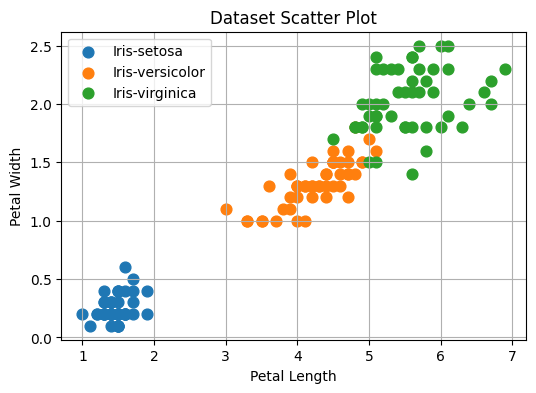

=> Saved: 0_scatter_plot.png

Train/Test Shapes:
X_train: (120, 4)  | X_test: (30, 4)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Figure size 640x480 with 0 Axes>

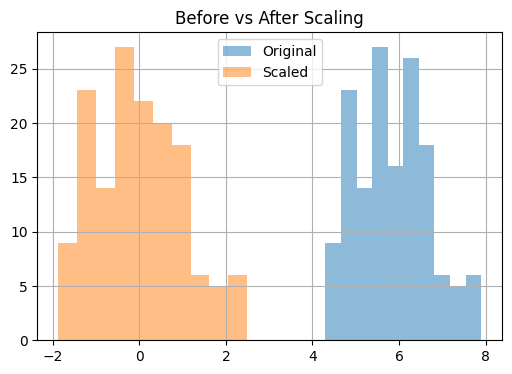

=> Saved: 1_scaling_difference.png

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "Iris_MLP_LeakyReLU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Dense_1 (Dense)          │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Act_1 (LeakyReLU)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Dense_2 (Dense)          │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Act_2 (LeakyReLU)        │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323 (1.26 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

=> Saved: model_architecture.png


<Figure size 640x480 with 0 Axes>

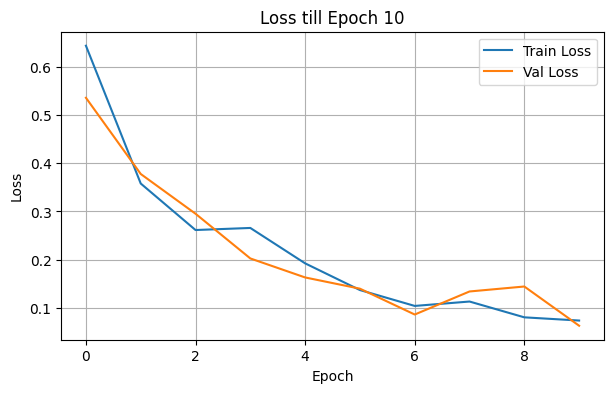

=> Saved: loss_until_epoch_10.png


<Figure size 640x480 with 0 Axes>

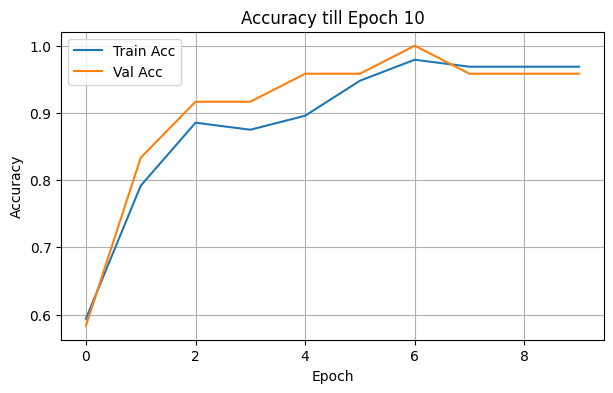

=> Saved: accuracy_until_epoch_10.png


<Figure size 640x480 with 0 Axes>

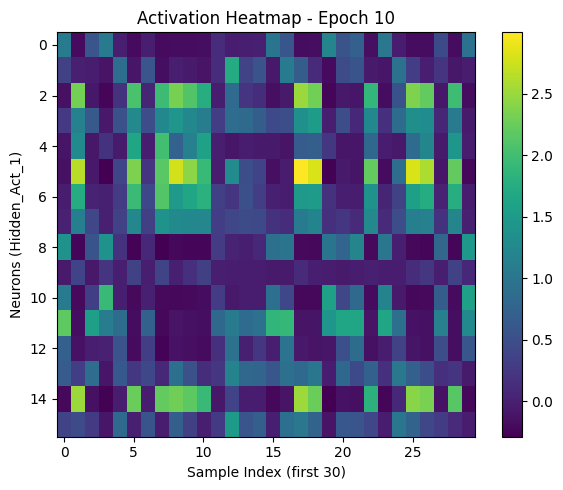

=> Saved: activation_epoch_10.png
Images saved for epoch 10 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

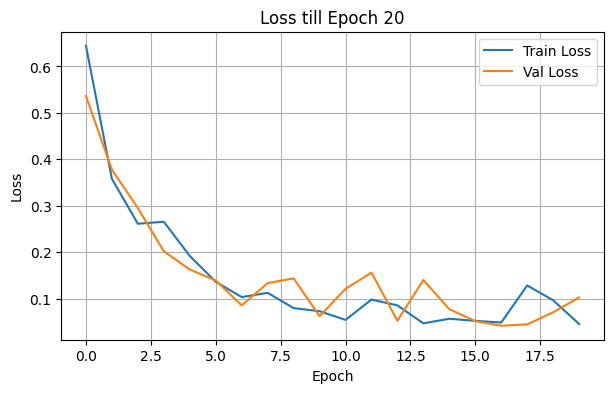

=> Saved: loss_until_epoch_20.png


<Figure size 640x480 with 0 Axes>

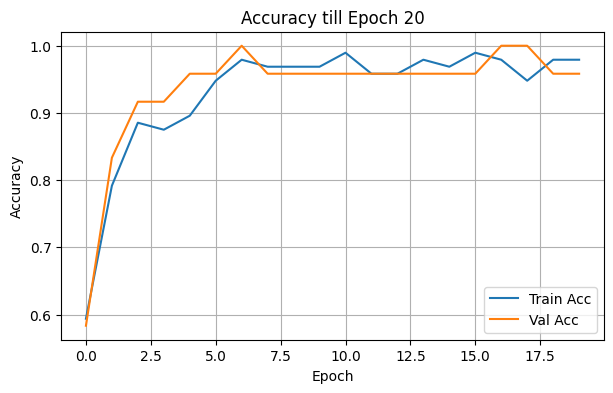

=> Saved: accuracy_until_epoch_20.png


<Figure size 640x480 with 0 Axes>

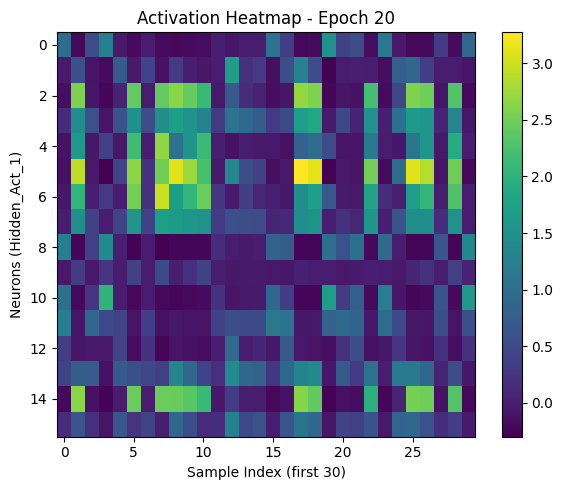

=> Saved: activation_epoch_20.png
Images saved for epoch 20 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

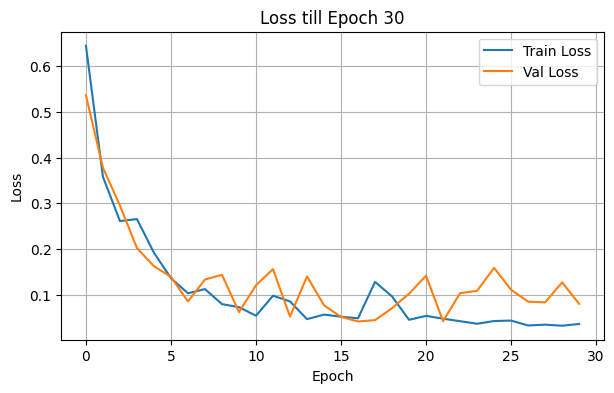

=> Saved: loss_until_epoch_30.png


<Figure size 640x480 with 0 Axes>

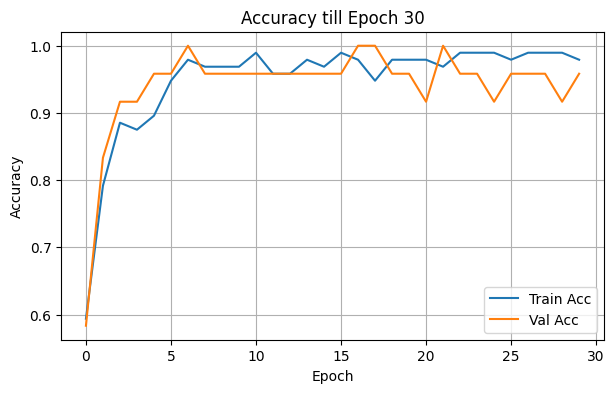

=> Saved: accuracy_until_epoch_30.png


<Figure size 640x480 with 0 Axes>

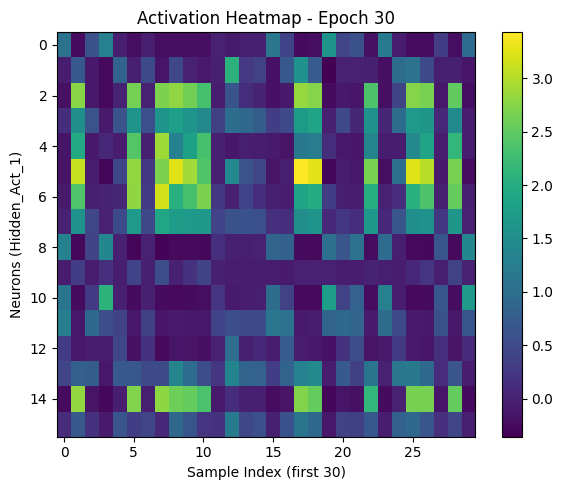

=> Saved: activation_epoch_30.png
Images saved for epoch 30 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

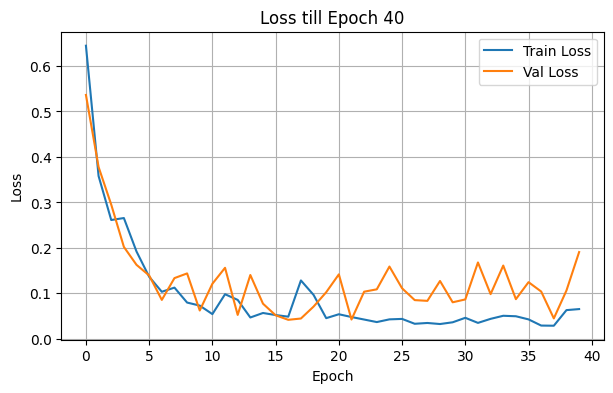

=> Saved: loss_until_epoch_40.png


<Figure size 640x480 with 0 Axes>

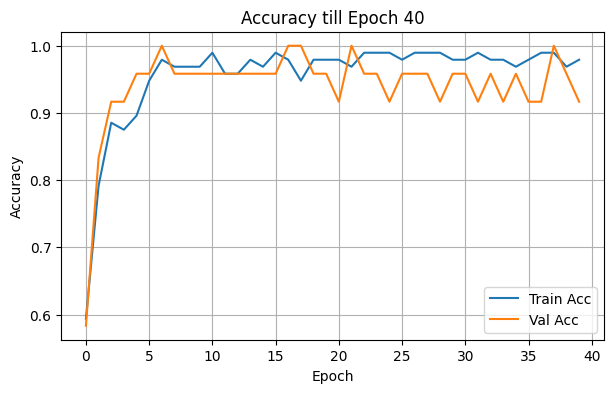

=> Saved: accuracy_until_epoch_40.png


<Figure size 640x480 with 0 Axes>

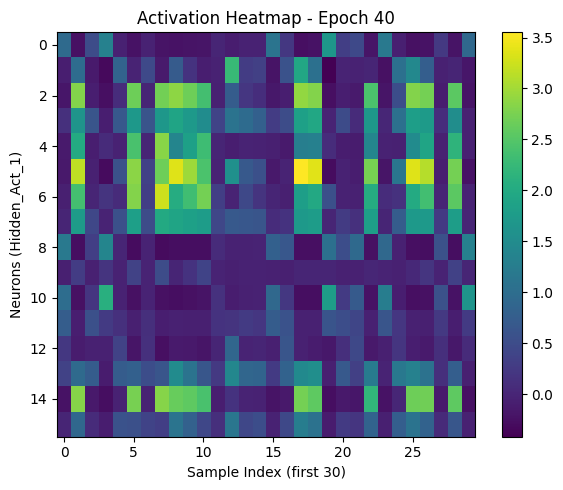

=> Saved: activation_epoch_40.png
Images saved for epoch 40 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

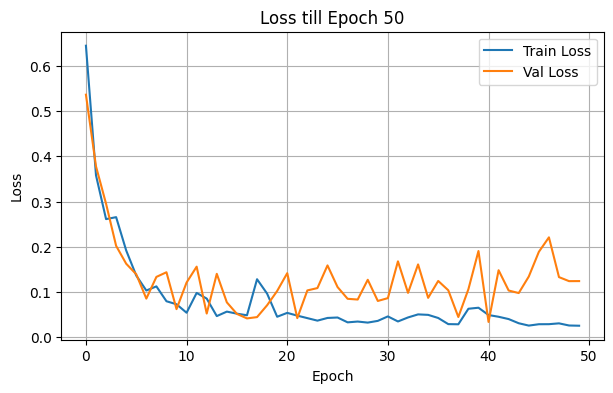

=> Saved: loss_until_epoch_50.png


<Figure size 640x480 with 0 Axes>

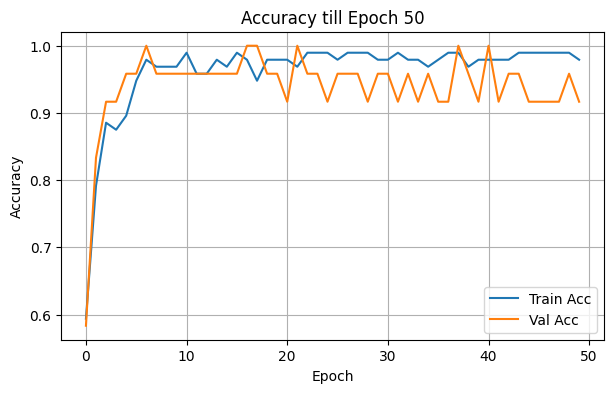

=> Saved: accuracy_until_epoch_50.png


<Figure size 640x480 with 0 Axes>

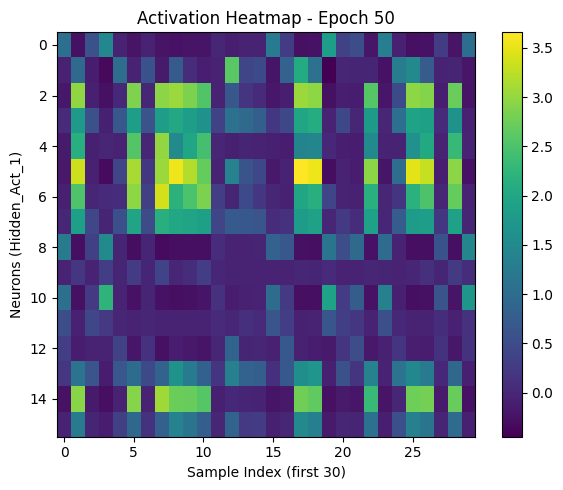

=> Saved: activation_epoch_50.png
Images saved for epoch 50 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

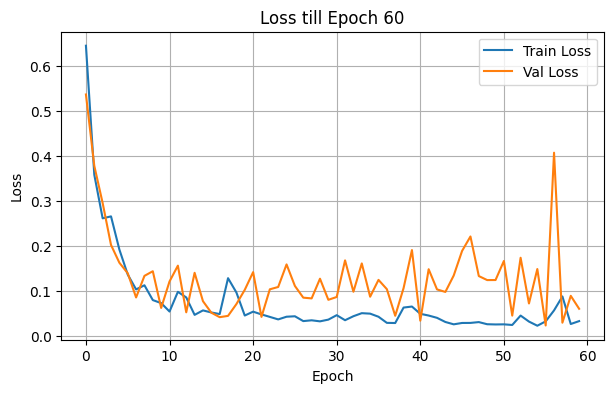

=> Saved: loss_until_epoch_60.png


<Figure size 640x480 with 0 Axes>

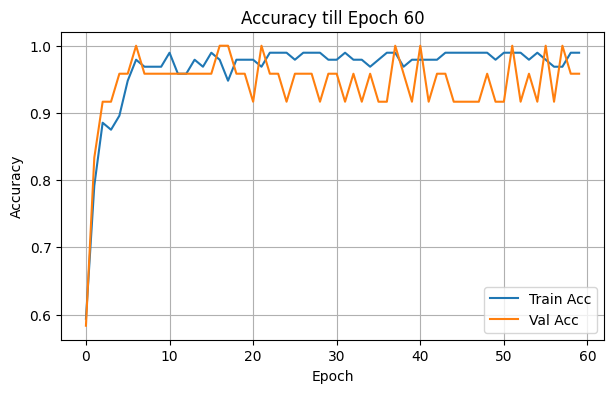

=> Saved: accuracy_until_epoch_60.png


<Figure size 640x480 with 0 Axes>

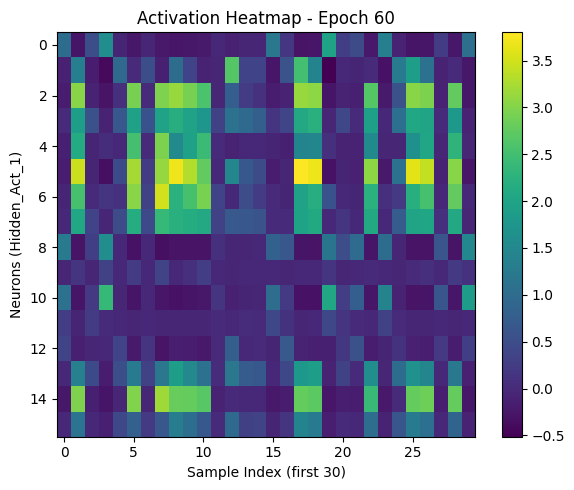

=> Saved: activation_epoch_60.png
Images saved for epoch 60 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

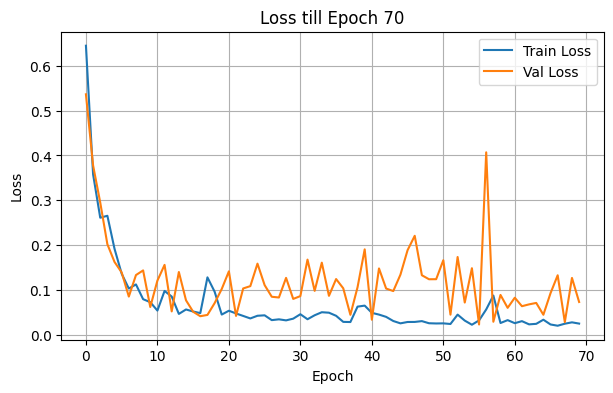

=> Saved: loss_until_epoch_70.png


<Figure size 640x480 with 0 Axes>

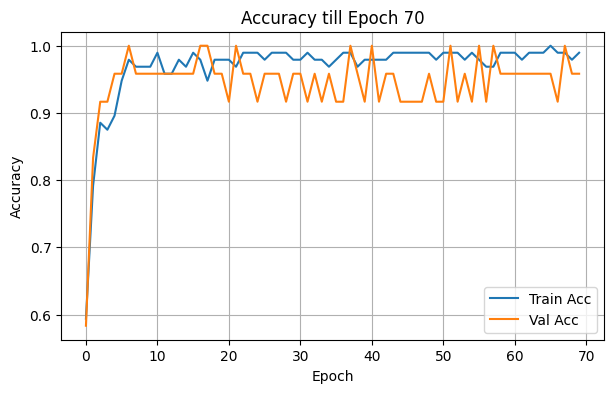

=> Saved: accuracy_until_epoch_70.png


<Figure size 640x480 with 0 Axes>

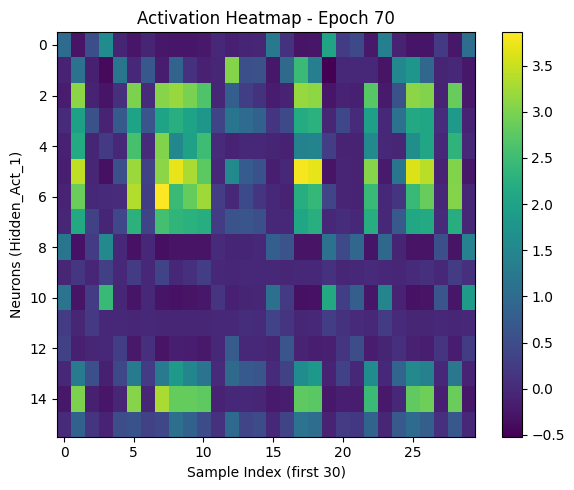

=> Saved: activation_epoch_70.png
Images saved for epoch 70 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

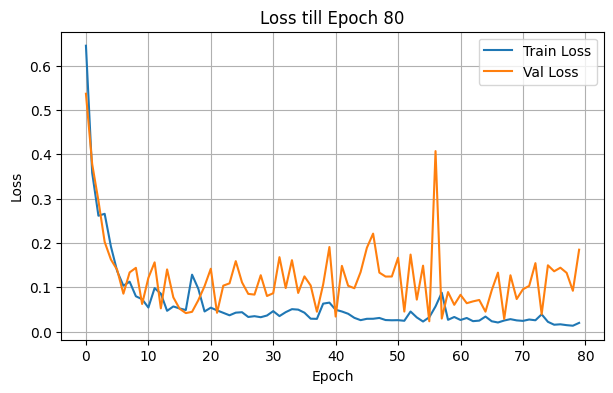

=> Saved: loss_until_epoch_80.png


<Figure size 640x480 with 0 Axes>

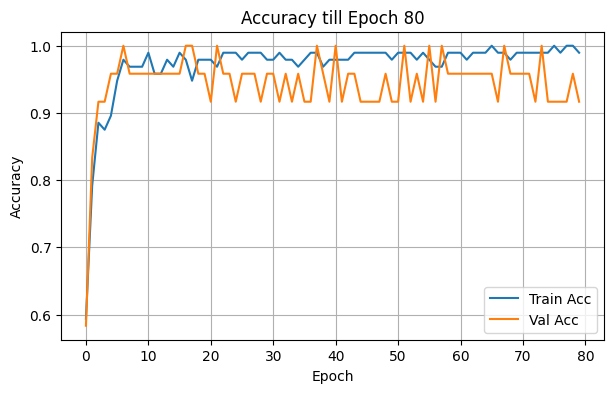

=> Saved: accuracy_until_epoch_80.png


<Figure size 640x480 with 0 Axes>

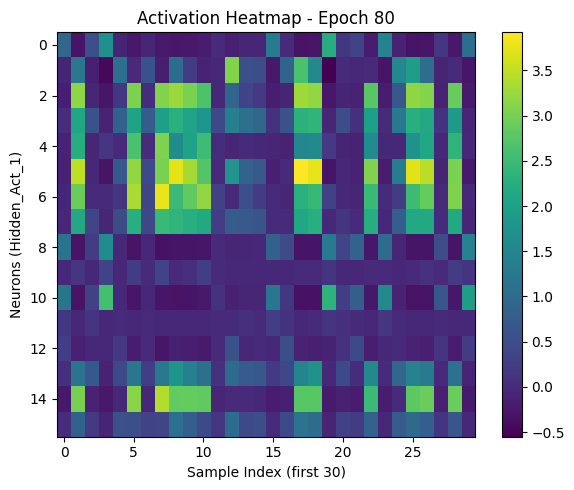

=> Saved: activation_epoch_80.png
Images saved for epoch 80 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

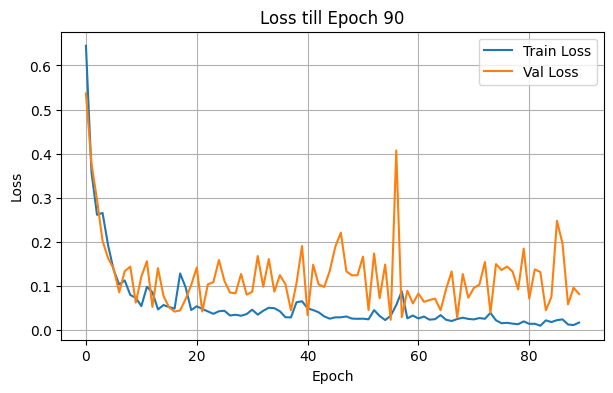

=> Saved: loss_until_epoch_90.png


<Figure size 640x480 with 0 Axes>

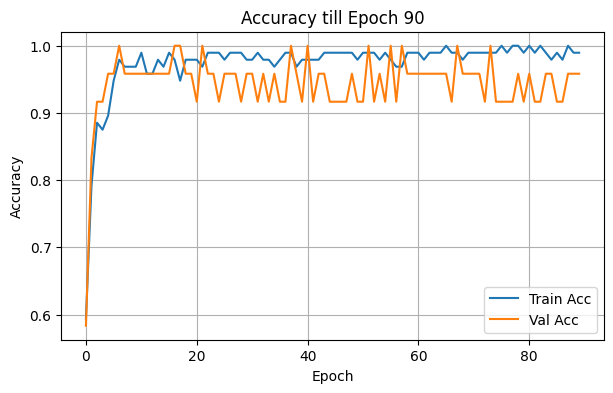

=> Saved: accuracy_until_epoch_90.png


<Figure size 640x480 with 0 Axes>

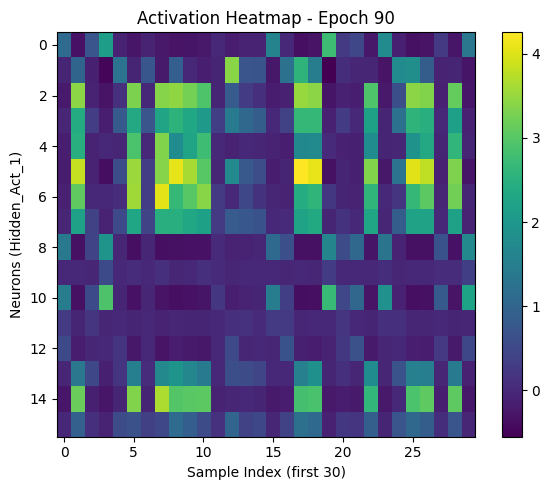

=> Saved: activation_epoch_90.png
Images saved for epoch 90 (Loss, Accuracy, Activation)



<Figure size 640x480 with 0 Axes>

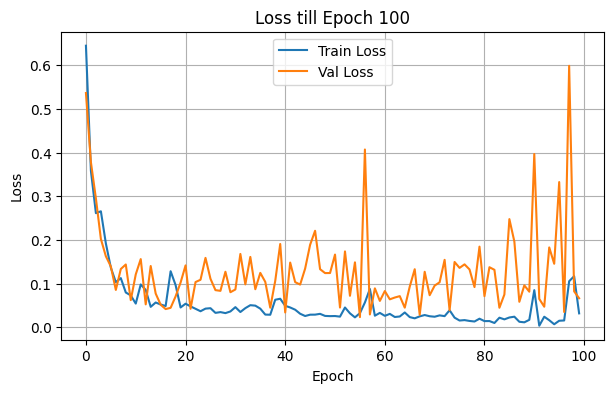

=> Saved: loss_until_epoch_100.png


<Figure size 640x480 with 0 Axes>

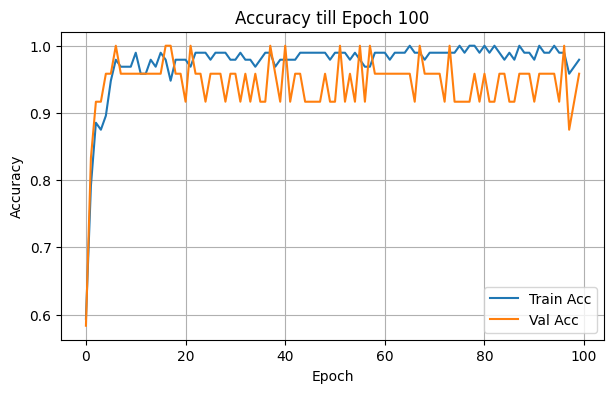

=> Saved: accuracy_until_epoch_100.png


<Figure size 640x480 with 0 Axes>

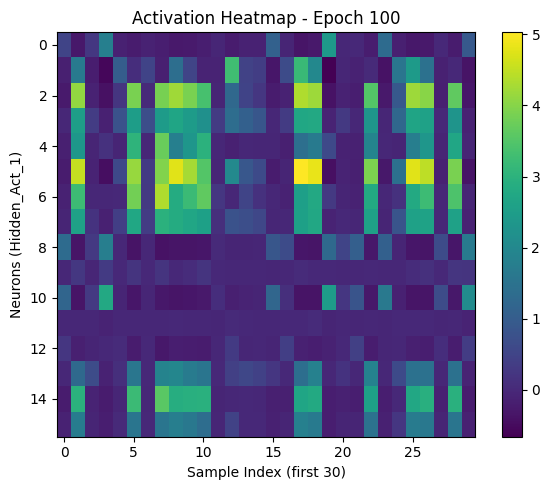

=> Saved: activation_epoch_100.png
Images saved for epoch 100 (Loss, Accuracy, Activation)


🎉 Training Complete!
All stage graphs saved.

Classification Report:


precision    recall  f1-score    support
Iris-setosa       1.000000  1.000000  1.000000  10.000000
Iris-versicolor   1.000000  0.900000  0.947368  10.000000
Iris-virginica    0.909091  1.000000  0.952381  10.000000
accuracy          0.966667  0.966667  0.966667   0.966667
macro avg         0.969697  0.966667  0.966583  30.000000
weighted avg      0.969697  0.966667  0.966583  30.000000

<Figure size 640x480 with 0 Axes>

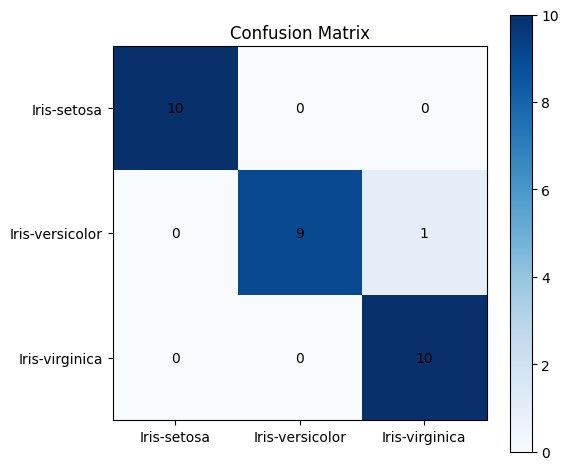

=> Saved: final_confusion_matrix.png

📌 All graphs available inside: /kaggle/working/mlp_images/


<Figure size 640x480 with 0 Axes>

In [3]:
# ===============================================
# IRIS MLP Neural Network with step-wise graph saving
# Creates images every 10 epochs (for animation/PPT)
# With LeakyReLU + larger hidden layers to increase activations
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.utils import plot_model
from IPython.display import display, Image

# -------------------------------------------------
# Create folder for all PPT images
# -------------------------------------------------
save_path = "/kaggle/working/mlp_images"
os.makedirs(save_path, exist_ok=True)

def save_fig(name):
    plt.savefig(f"{save_path}/{name}.png", dpi=300, bbox_inches="tight")
    print(f"=> Saved: {name}.png")

# -------------------------------------------------
# Load Dataset
# -------------------------------------------------
FILE_PATH = "/kaggle/input/iris/Iris.csv"
data = pd.read_csv(FILE_PATH)

if "Id" in data.columns:
    data = data.drop("Id", axis=1)

print("\nDataset Preview:")
display(data.head())
print("\nClass Distribution:")
print(data["Species"].value_counts())

# -------------------------------------------------
# Visualize Dataset (Scatter)
# -------------------------------------------------
plt.figure(figsize=(6,4))
for species, color in zip(data["Species"].unique(), ["red","green","blue"]):
    subset = data[data["Species"] == species]
    plt.scatter(
        subset["PetalLengthCm"],
        subset["PetalWidthCm"],
        label=species,
        s=60
    )
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Dataset Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()
save_fig("0_scatter_plot")

# -------------------------------------------------
# Preprocessing Scaling & Encoding
# -------------------------------------------------
X = data.drop("Species", axis=1).values
y = data["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

binarizer = LabelBinarizer()
y_encoded = binarizer.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

print("\nTrain/Test Shapes:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("Classes:", binarizer.classes_)

# Scaling Visual
plt.figure(figsize=(6,4))
plt.hist(X[:, 0], alpha=0.5, label="Original")
plt.hist(X_scaled[:, 0], alpha=0.5, label="Scaled")
plt.title("Before vs After Scaling")
plt.legend()
plt.grid(True)
plt.show()
save_fig("1_scaling_difference")

# -------------------------------------------------
# Model Creation  (LeakyReLU + more neurons for stronger activations)
# -------------------------------------------------
inputs = Input(shape=(4,), name="Input_Layer")

# First hidden layer (no activation inside Dense, separate LeakyReLU)
x = Dense(16, name="Hidden_Dense_1")(inputs)
x = LeakyReLU(alpha=0.1, name="Hidden_Act_1")(x)

# Second hidden layer
x = Dense(12, name="Hidden_Dense_2")(x)
x = LeakyReLU(alpha=0.1, name="Hidden_Act_2")(x)

# Output layer
outputs = Dense(3, activation="softmax", name="Output_Layer")(x)

model = Model(inputs, outputs, name="Iris_MLP_LeakyReLU")
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\nModel Summary:")
model.summary()

plot_model(
    model,
    to_file=f"{save_path}/model_architecture.png",
    show_shapes=True,
    dpi=150
)
print("=> Saved: model_architecture.png")

# -------------------------------------------------
# Training with per-10-epoch plotting + ACTIVATION MAP
# -------------------------------------------------
epochs = 100
batch = 4

history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []

# Model to extract activations from first LeakyReLU layer
activation_layer = model.get_layer("Hidden_Act_1")
activation_model = Model(inputs=model.input, outputs=activation_layer.output)

for epoch in range(1, epochs + 1):
    h = model.fit(
        X_train,
        y_train,
        epochs=1,
        batch_size=batch,
        validation_split=0.2,
        verbose=0
    )

    # Store progress
    history_acc.append(h.history["accuracy"][0])
    history_val_acc.append(h.history["val_accuracy"][0])
    history_loss.append(h.history["loss"][0])
    history_val_loss.append(h.history["val_loss"][0])

    # Save progression graphs every 10 epochs
    if epoch % 10 == 0:
        # ---------------- LOSS PLOT ----------------
        plt.figure(figsize=(7, 4))
        plt.plot(history_loss, label="Train Loss")
        plt.plot(history_val_loss, label="Val Loss")
        plt.title(f"Loss till Epoch {epoch}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()
        save_fig(f"loss_until_epoch_{epoch}")

        # ---------------- ACCURACY PLOT ----------------
        plt.figure(figsize=(7, 4))
        plt.plot(history_acc, label="Train Acc")
        plt.plot(history_val_acc, label="Val Acc")
        plt.title(f"Accuracy till Epoch {epoch}")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()
        save_fig(f"accuracy_until_epoch_{epoch}")

        # ---------------- ACTIVATION MAP ----------------
        # Take first 30 samples to visualize neuron activity evolution
        activations = activation_model.predict(X_train[:30], verbose=0)

        plt.figure(figsize=(6, 5))
        plt.imshow(activations.T, aspect="auto", cmap="viridis")
        plt.colorbar()
        plt.title(f"Activation Heatmap - Epoch {epoch}")
        plt.xlabel("Sample Index (first 30)")
        plt.ylabel("Neurons (Hidden_Act_1)")
        plt.tight_layout()
        plt.show()
        save_fig(f"activation_epoch_{epoch}")

        print(
            f"Images saved for epoch {epoch} "
            f"(Loss, Accuracy, Activation)\n"
        )

print("\n🎉 Training Complete!\nAll stage graphs saved.")

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
y_true = binarizer.inverse_transform(y_test)
y_pred = binarizer.inverse_transform(model.predict(X_test, verbose=0))

print("\nClassification Report:")
report = pd.DataFrame(
    classification_report(y_true, y_pred, output_dict=True)
).transpose()
display(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks(np.arange(3), binarizer.classes_)
plt.yticks(np.arange(3), binarizer.classes_)
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()
save_fig("final_confusion_matrix")

print("\n📌 All graphs available inside: /kaggle/working/mlp_images/")
